In [1]:
pip install scikit-optimize tune-sklearn


In [2]:
# Standard Libraries
import os
import logging
import warnings
import time
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from joblib import dump, load
from sklearn.model_selection import (train_test_split, RandomizedSearchCV,
                                        StratifiedKFold)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Ensemble Methods
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                                 AdaBoostClassifier, ExtraTreesClassifier,
                                 HistGradientBoostingClassifier, StackingClassifier,
                                 VotingClassifier, BaggingClassifier)

# Neural Networks and Tree-Based Models
from sklearn.linear_model import (LogisticRegression, PassiveAggressiveClassifier, 
                                    SGDClassifier, RidgeClassifier, Perceptron)  
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Neighbors and Naive Bayes
from sklearn.neighbors import (KNeighborsClassifier, NearestCentroid, 
                               RadiusNeighborsClassifier)
from sklearn.naive_bayes import BernoulliNB, GaussianNB

# Metrics
from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score,
                                recall_score, f1_score, confusion_matrix,
                                classification_report, precision_recall_curve,
                                roc_curve)

# Tree Models
from sklearn.tree import DecisionTreeClassifier

# Neural Network
from sklearn.neural_network import MLPClassifier

# Statistical Models
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis, 
                                            QuadraticDiscriminantAnalysis)

# Imbalanced Learning
from imblearn.over_sampling import SMOTE

# Statistics
from scipy import stats

# SHAP for model interpretation
import shap
# Import necessary libraries
import os
import logging
from joblib import dump
from sklearn.ensemble import (
    StackingClassifier,
    VotingClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    ExtraTreesClassifier,
    BaggingClassifier
)
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import logging
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
from joblib import dump
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
import logging
from sklearn.preprocessing import FunctionTransformer



In [3]:

# Suppress warnings
warnings.filterwarnings("ignore")

# Configure logging with timestamp
log_filename = f'model_performance_{pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")}.log'
logging.basicConfig(filename=log_filename, level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

# Constants
DATASET_PATH = 'E:/projects/Heart_Attack_Prediction/data.csv'
MODEL_SAVE_PATH = 'E:/projects/Heart_Attack_Prediction/models'
PREPROCESSOR_PATH ='E:/projects/Heart_Attack_Prediction/models'
VISUALIZATION_PATH = 'E:/projects/Heart_Attack_Prediction/visualizations'


In [4]:
# Load the dataset
df = pd.read_csv(DATASET_PATH)
logging.info("Dataset loaded successfully.")
print("Dataset loaded successfully.")

def data_description(df):
    logging.info("=== Data Description ===")
    print("=== Data Description ===")
    logging.info(df.info())
    print(df.info())

    logging.info("\n=== Summary Statistics ===")
    print("\n=== Summary Statistics ===")
    logging.info(df.describe())
    print(df.describe())

    logging.info("\n=== Missing Values ===")
    print("\n=== Missing Values ===")
    logging.info(df.isnull().sum())
    print(df.isnull().sum())

    logging.info("\n=== Unique Values in Each Column ===")
    print("\n=== Unique Values in Each Column ===")
    for column in df.columns:
        unique_values = df[column].nunique()
        logging.info(f"{column}: {unique_values} unique values")
        print(f"{column}: {unique_values} unique values")

data_description(df)


Dataset loaded successfully.
=== Data Description ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161 entries, 0 to 2160
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2161 non-null   int64  
 1   sex       2161 non-null   int64  
 2   cp        2161 non-null   int64  
 3   trtbps    2161 non-null   int64  
 4   chol      2161 non-null   int64  
 5   fbs       2161 non-null   int64  
 6   restecg   2161 non-null   int64  
 7   thalachh  2161 non-null   int64  
 8   exng      2161 non-null   int64  
 9   oldpeak   2161 non-null   float64
 10  slp       2161 non-null   int64  
 11  caa       2161 non-null   int64  
 12  thall     2161 non-null   int64  
 13  output    2161 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 236.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161 entries, 0 to 2160
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    -

In [5]:

def explore_data(df):
    logging.info("Exploring data...")
    print("Exploring data...")
    logging.info(f"Data Summary:\n{df.describe()}")
    print(f"Data Summary:\n{df.describe()}")

    # Target Distribution
    plt.figure(figsize=(8, 4))
    sns.countplot(x='output', data=df)
    plt.title('Target Distribution')
    plt.xlabel('Output (0: No Heart Attack, 1: Heart Attack)')
    plt.ylabel('Count')
    plt.savefig(os.path.join(VISUALIZATION_PATH, 'target_distribution.png'))
    plt.close()
    print("Saved target distribution plot.")

    # Box Plots for Numerical Features
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df.select_dtypes(include=[np.number]), orient='h')
    plt.title('Box Plots for Numerical Features')
    plt.savefig(os.path.join(VISUALIZATION_PATH, 'box_plots.png'))
    plt.close()
    print("Saved box plots for numerical features.")

    # Violin Plots for each numerical column
    numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    for column in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.violinplot(x='output', y=column, data=df)
        plt.title(f'{column} Distribution by Heart Attack Status')
        plt.savefig(os.path.join(VISUALIZATION_PATH, f'{column}_violin_plot.png'))
        plt.close()
        print(f"Saved {column} violin plot.")

    # Joint Plot of Age and Cholesterol
    plt.figure(figsize=(8, 6))
    sns.jointplot(x='age', y='chol', data=df, kind='scatter', hue='output')
    plt.title('Joint Plot of Age and Cholesterol')
    plt.savefig(os.path.join(VISUALIZATION_PATH, 'age_chol_jointplot.png'))
    plt.close()
    print("Saved joint plot of Age and Cholesterol.")

    # Boxen Plot for Age Distribution
    plt.figure(figsize=(12, 6))
    sns.boxenplot(x='output', y='age', data=df)
    plt.title('Age Distribution by Heart Attack Status (Boxen Plot)')
    plt.savefig(os.path.join(VISUALIZATION_PATH, 'age_boxen_plot.png'))
    plt.close()
    print("Saved age distribution boxen plot.")

    # Categorical Features Distribution
    categorical_columns = ['sex', 'cp', 'restecg', 'slp', 'caa', 'thall']
    for column in categorical_columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue='output', data=df)
        plt.title(f'Distribution of {column} by Heart Attack Status')
        plt.savefig(os.path.join(VISUALIZATION_PATH, f'distribution_{column}.png'))
        plt.close()
        print(f"Saved distribution plot for {column}.")

    # Correlation Heatmap
    plt.figure(figsize=(10, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Heatmap')
    plt.savefig(os.path.join(VISUALIZATION_PATH, 'correlation_heatmap.png'))
    plt.close()
    print("Saved correlation heatmap.")

    # Missing Values
    missing_values = df.isnull().sum()
    logging.info(f"Missing values in each column:\n{missing_values[missing_values > 0]}")
    print(f"Missing values in each column:\n{missing_values[missing_values > 0]}")

explore_data(df)


Exploring data...
Data Summary:
               age          sex           cp       trtbps         chol  \
count  2161.000000  2161.000000  2161.000000  2161.000000  2161.000000   
mean     54.304026     0.677001     1.009255   130.930125   243.735770   
std       9.128995     0.467730     1.047443    16.538430    46.709227   
min      29.000000     0.000000     0.000000    93.000000   120.000000   
25%      47.000000     0.000000     0.000000   120.000000   212.000000   
50%      56.000000     1.000000     1.000000   130.000000   241.000000   
75%      61.000000     1.000000     2.000000   140.000000   274.000000   
max      77.000000     1.000000     3.000000   181.000000   396.000000   

               fbs      restecg     thalachh         exng      oldpeak  \
count  2161.000000  2161.000000  2161.000000  2161.000000  2161.000000   
mean      0.147617     0.538177   150.972235     0.330865     0.968302   
std       0.354802     0.522237    22.079133     0.470634     1.023307   
min  

<Figure size 800x600 with 0 Axes>

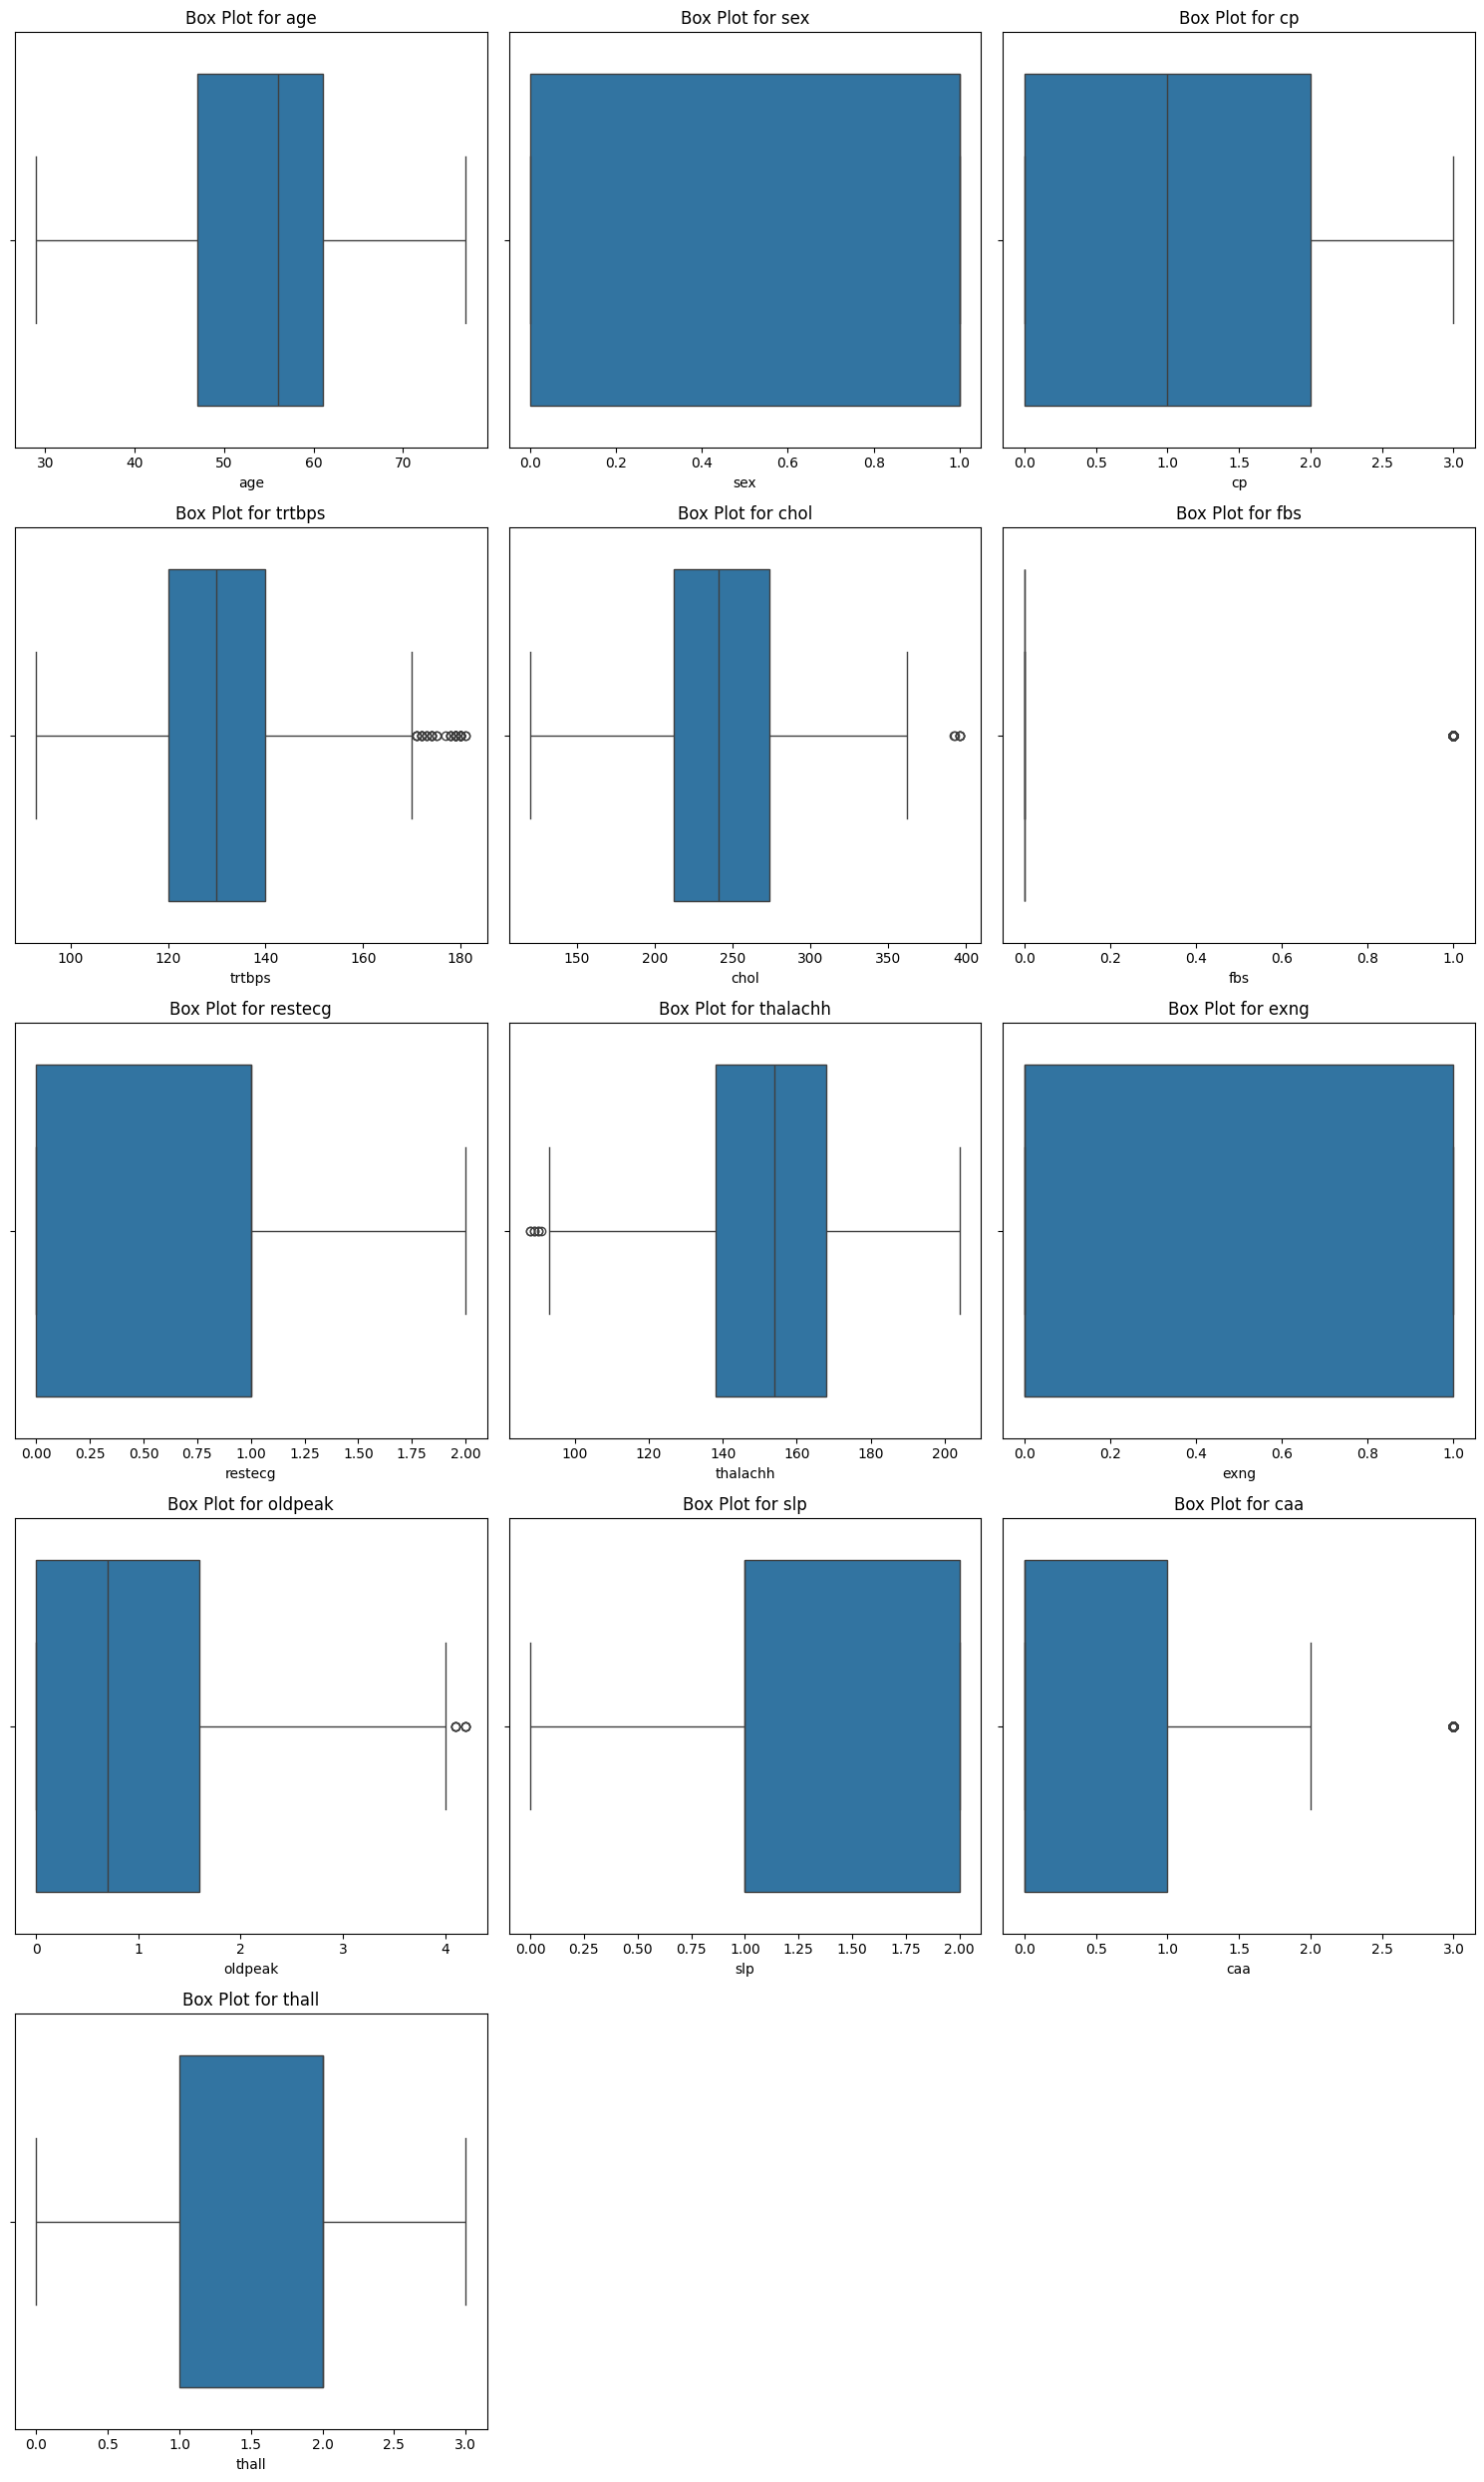

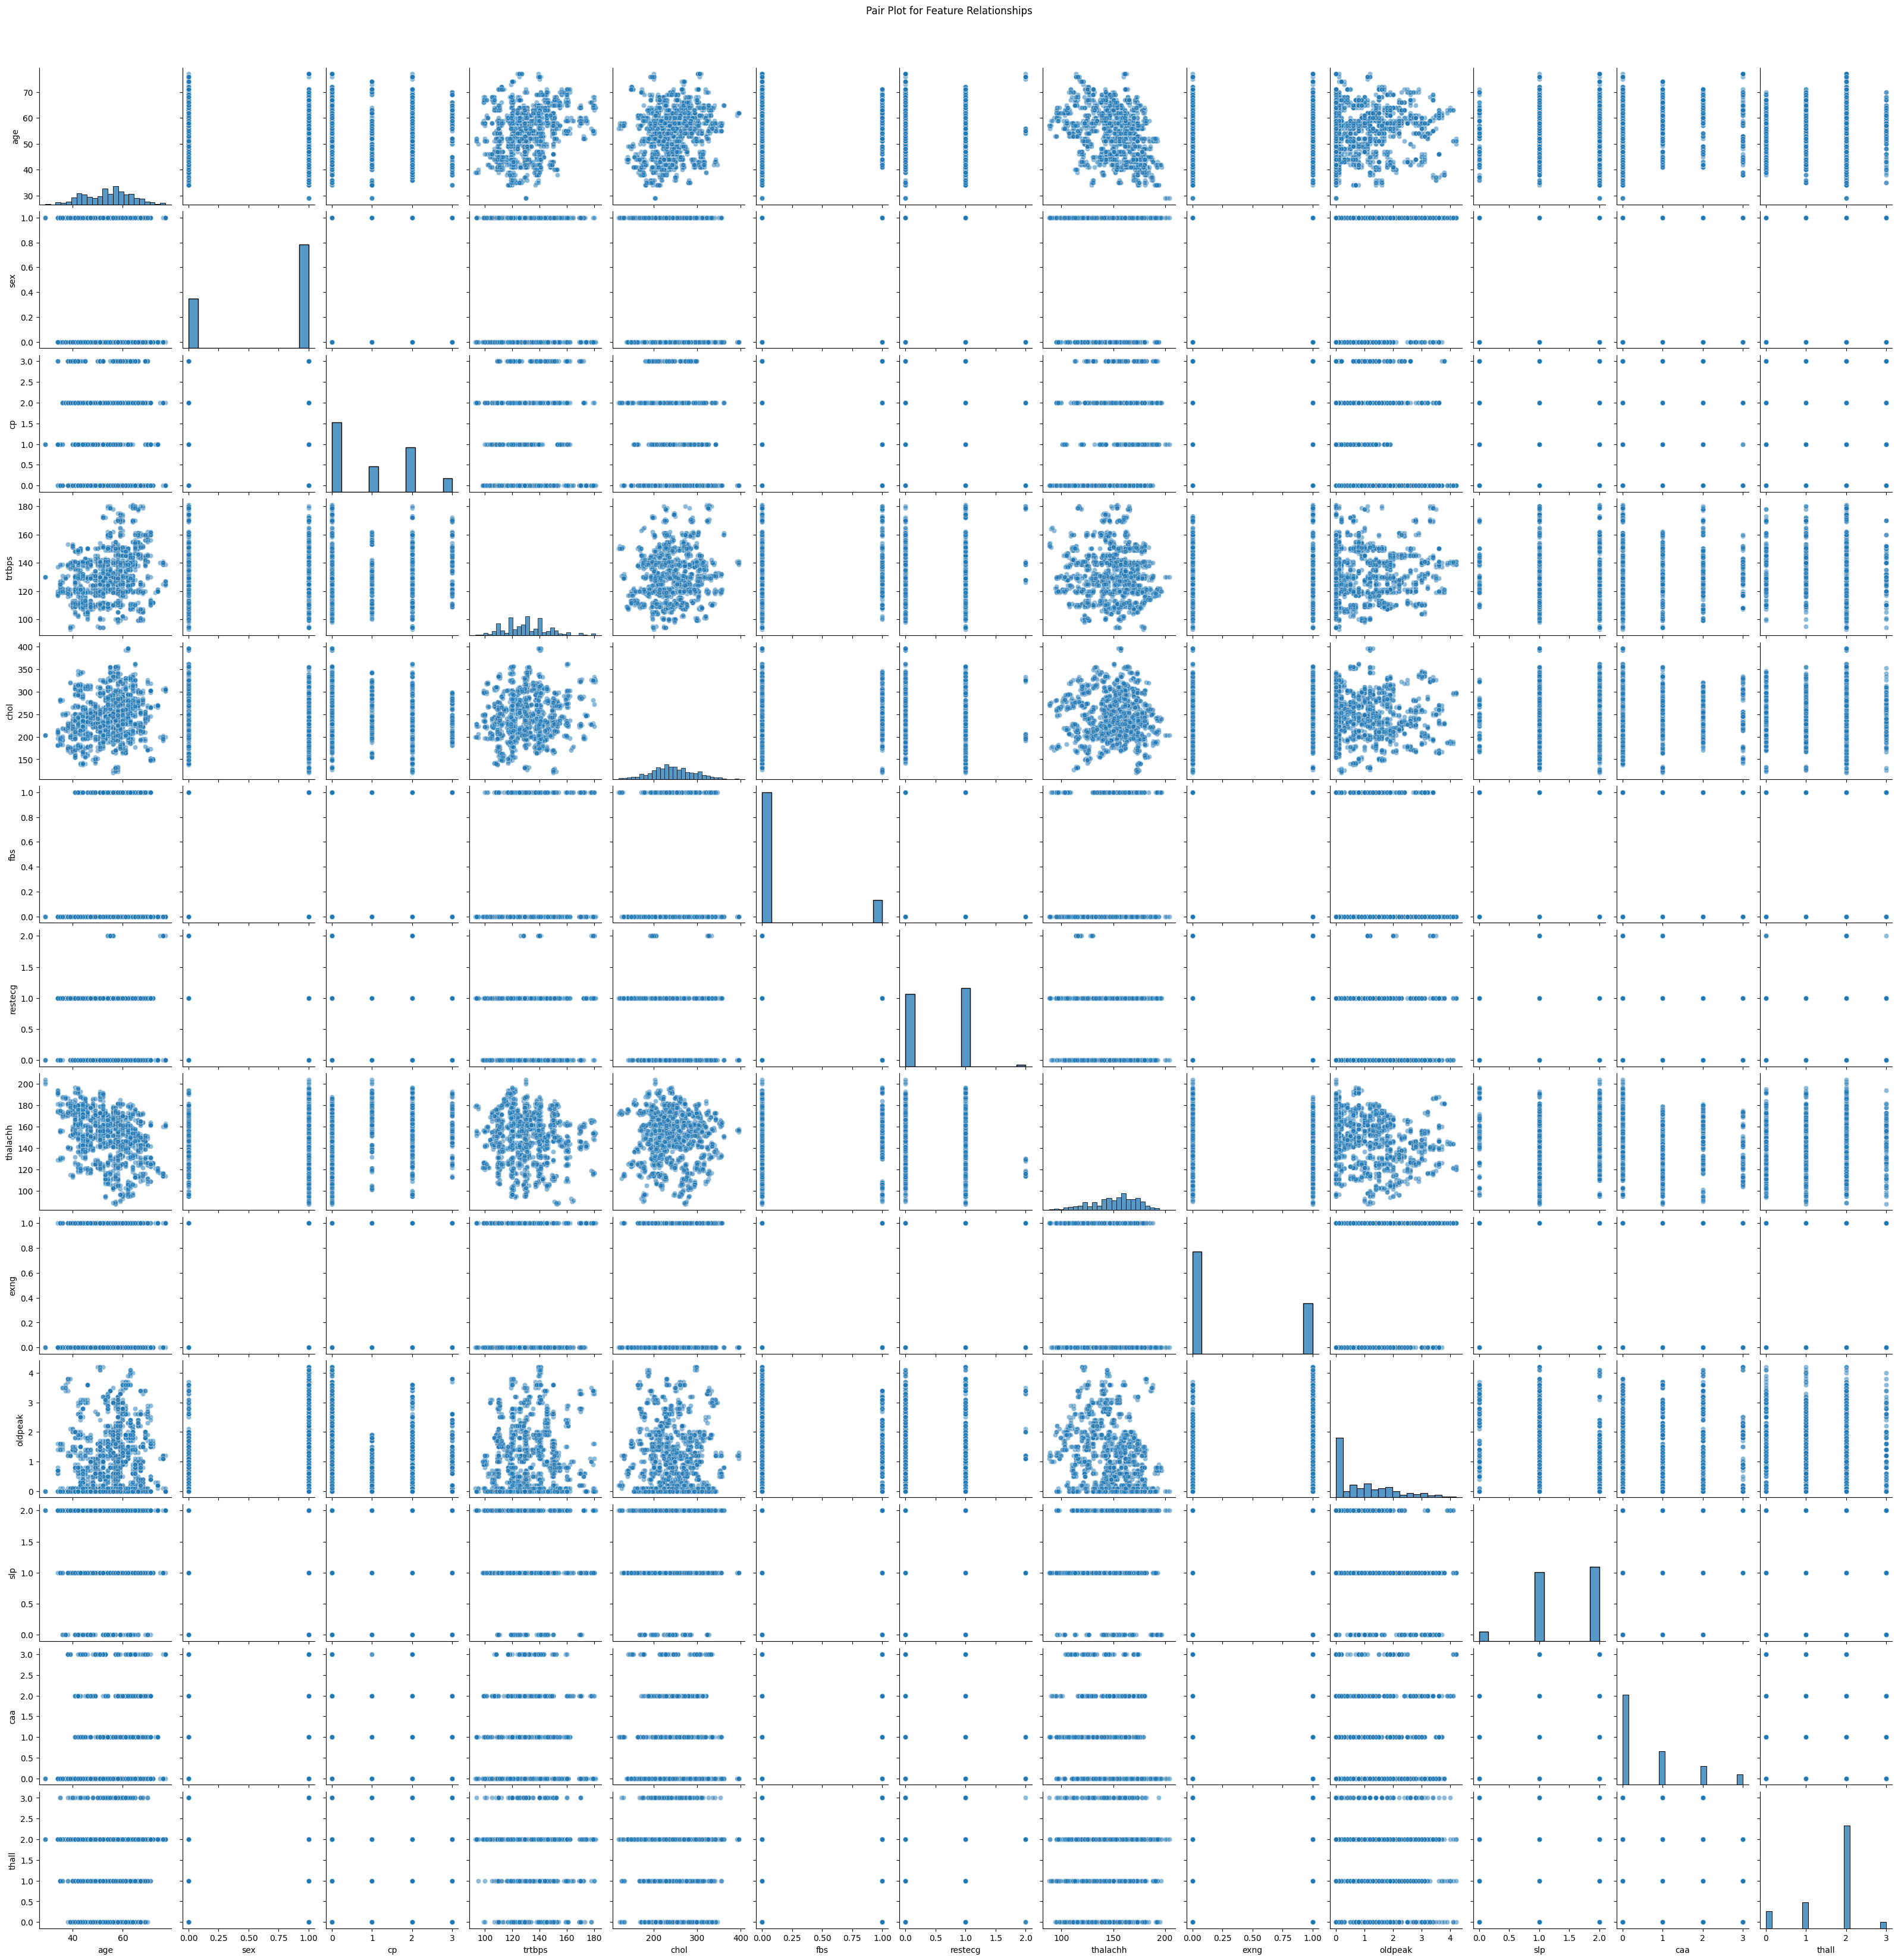

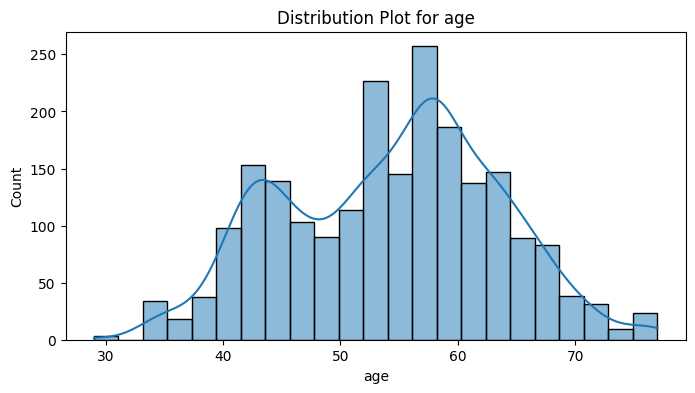

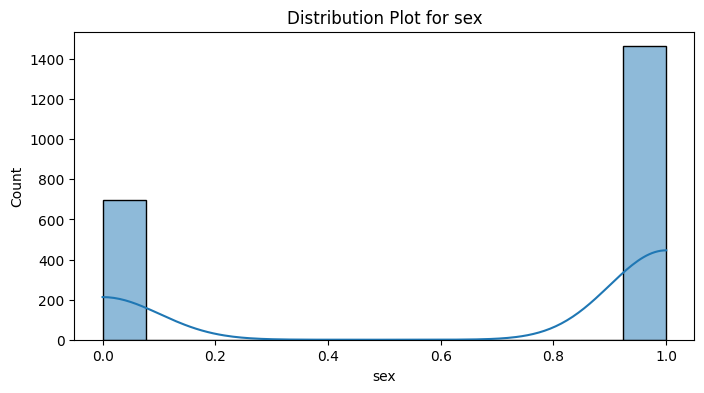

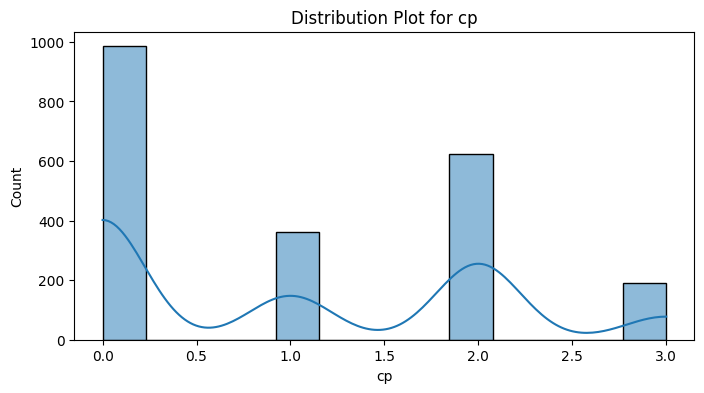

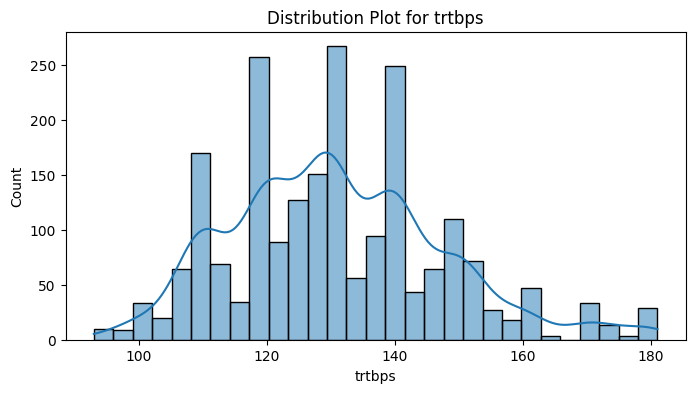

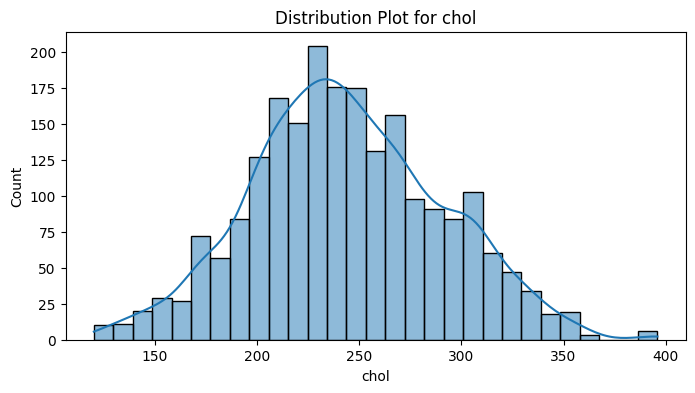

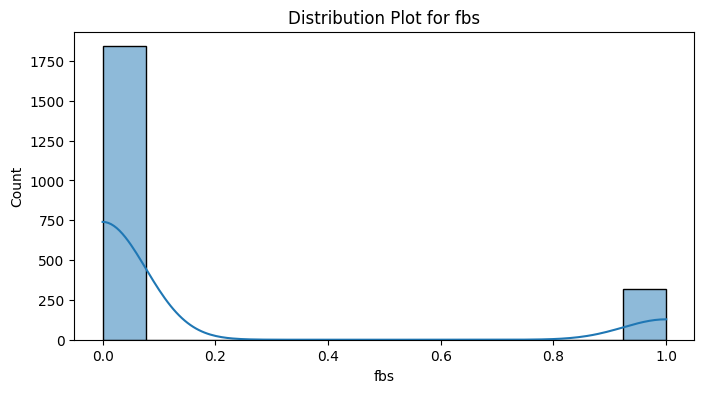

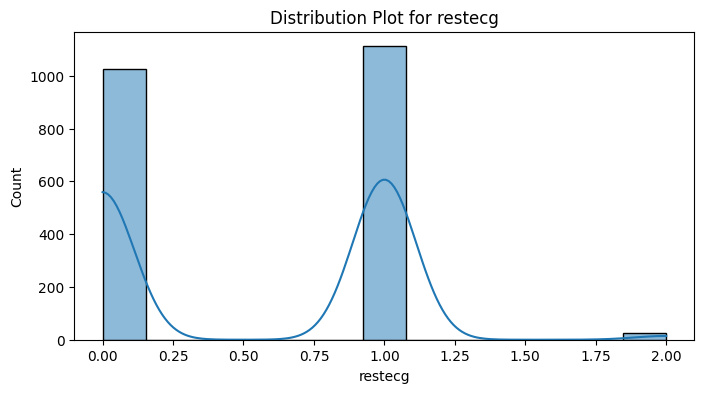

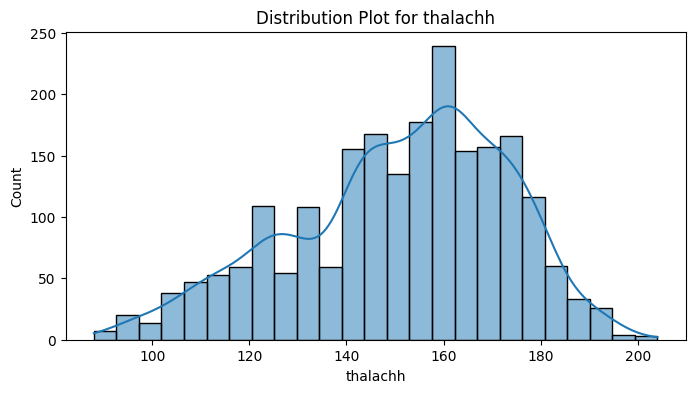

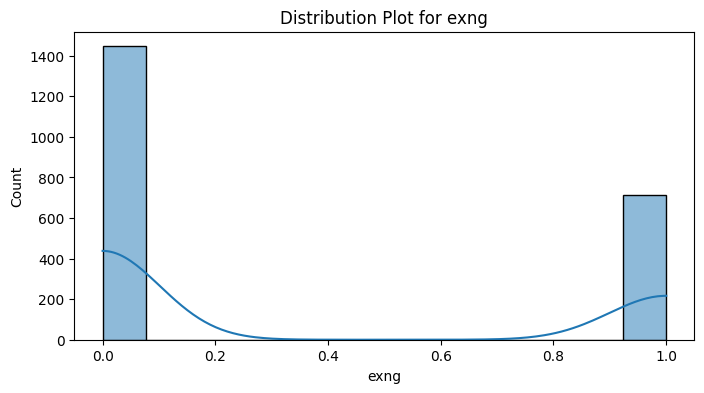

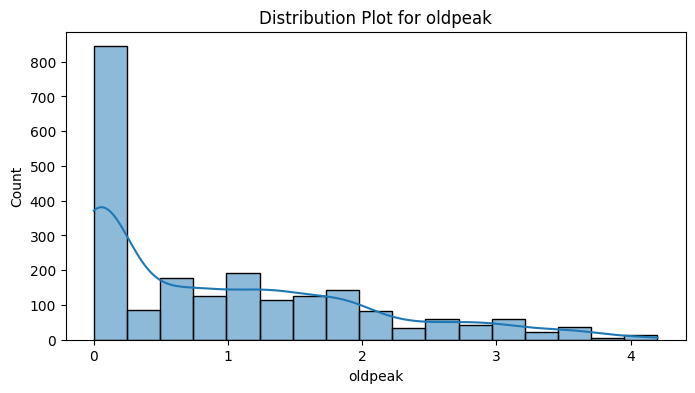

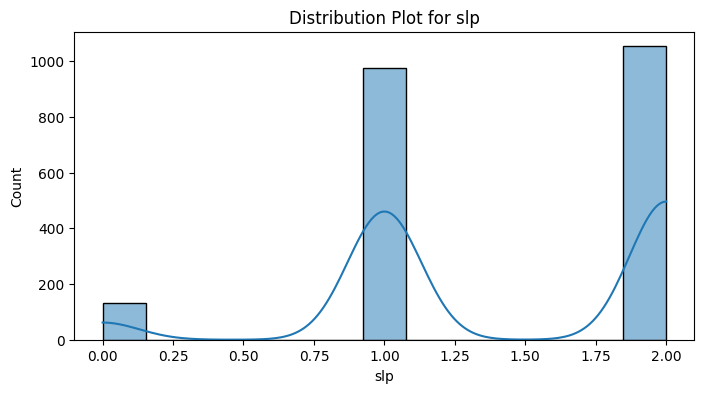

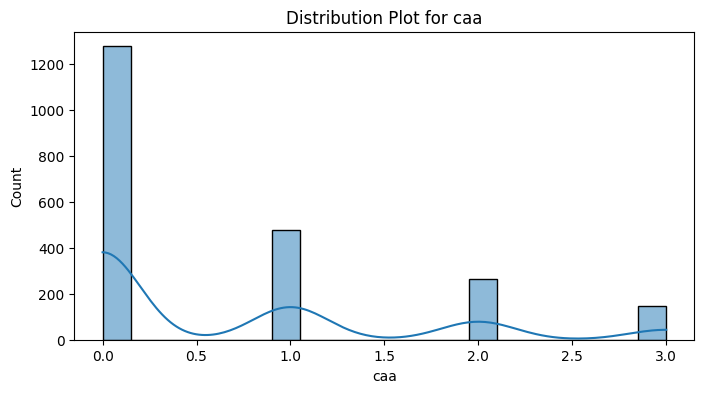

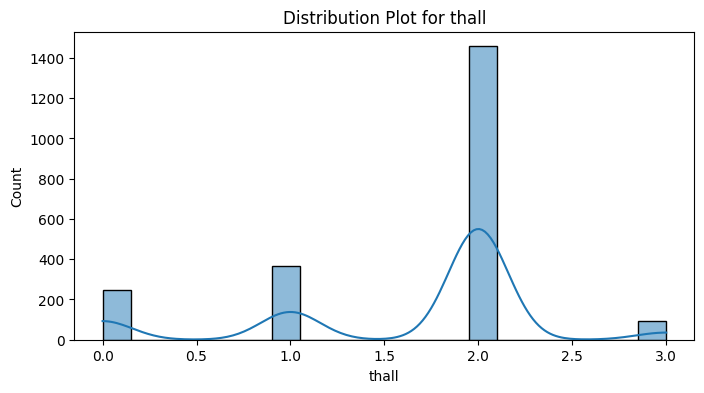

Detected 16 outliers out of 2161 instances. Removing outliers...
Preprocessor saved to model/preprocessor.joblib
Transformed feature shape: (2145, 13)


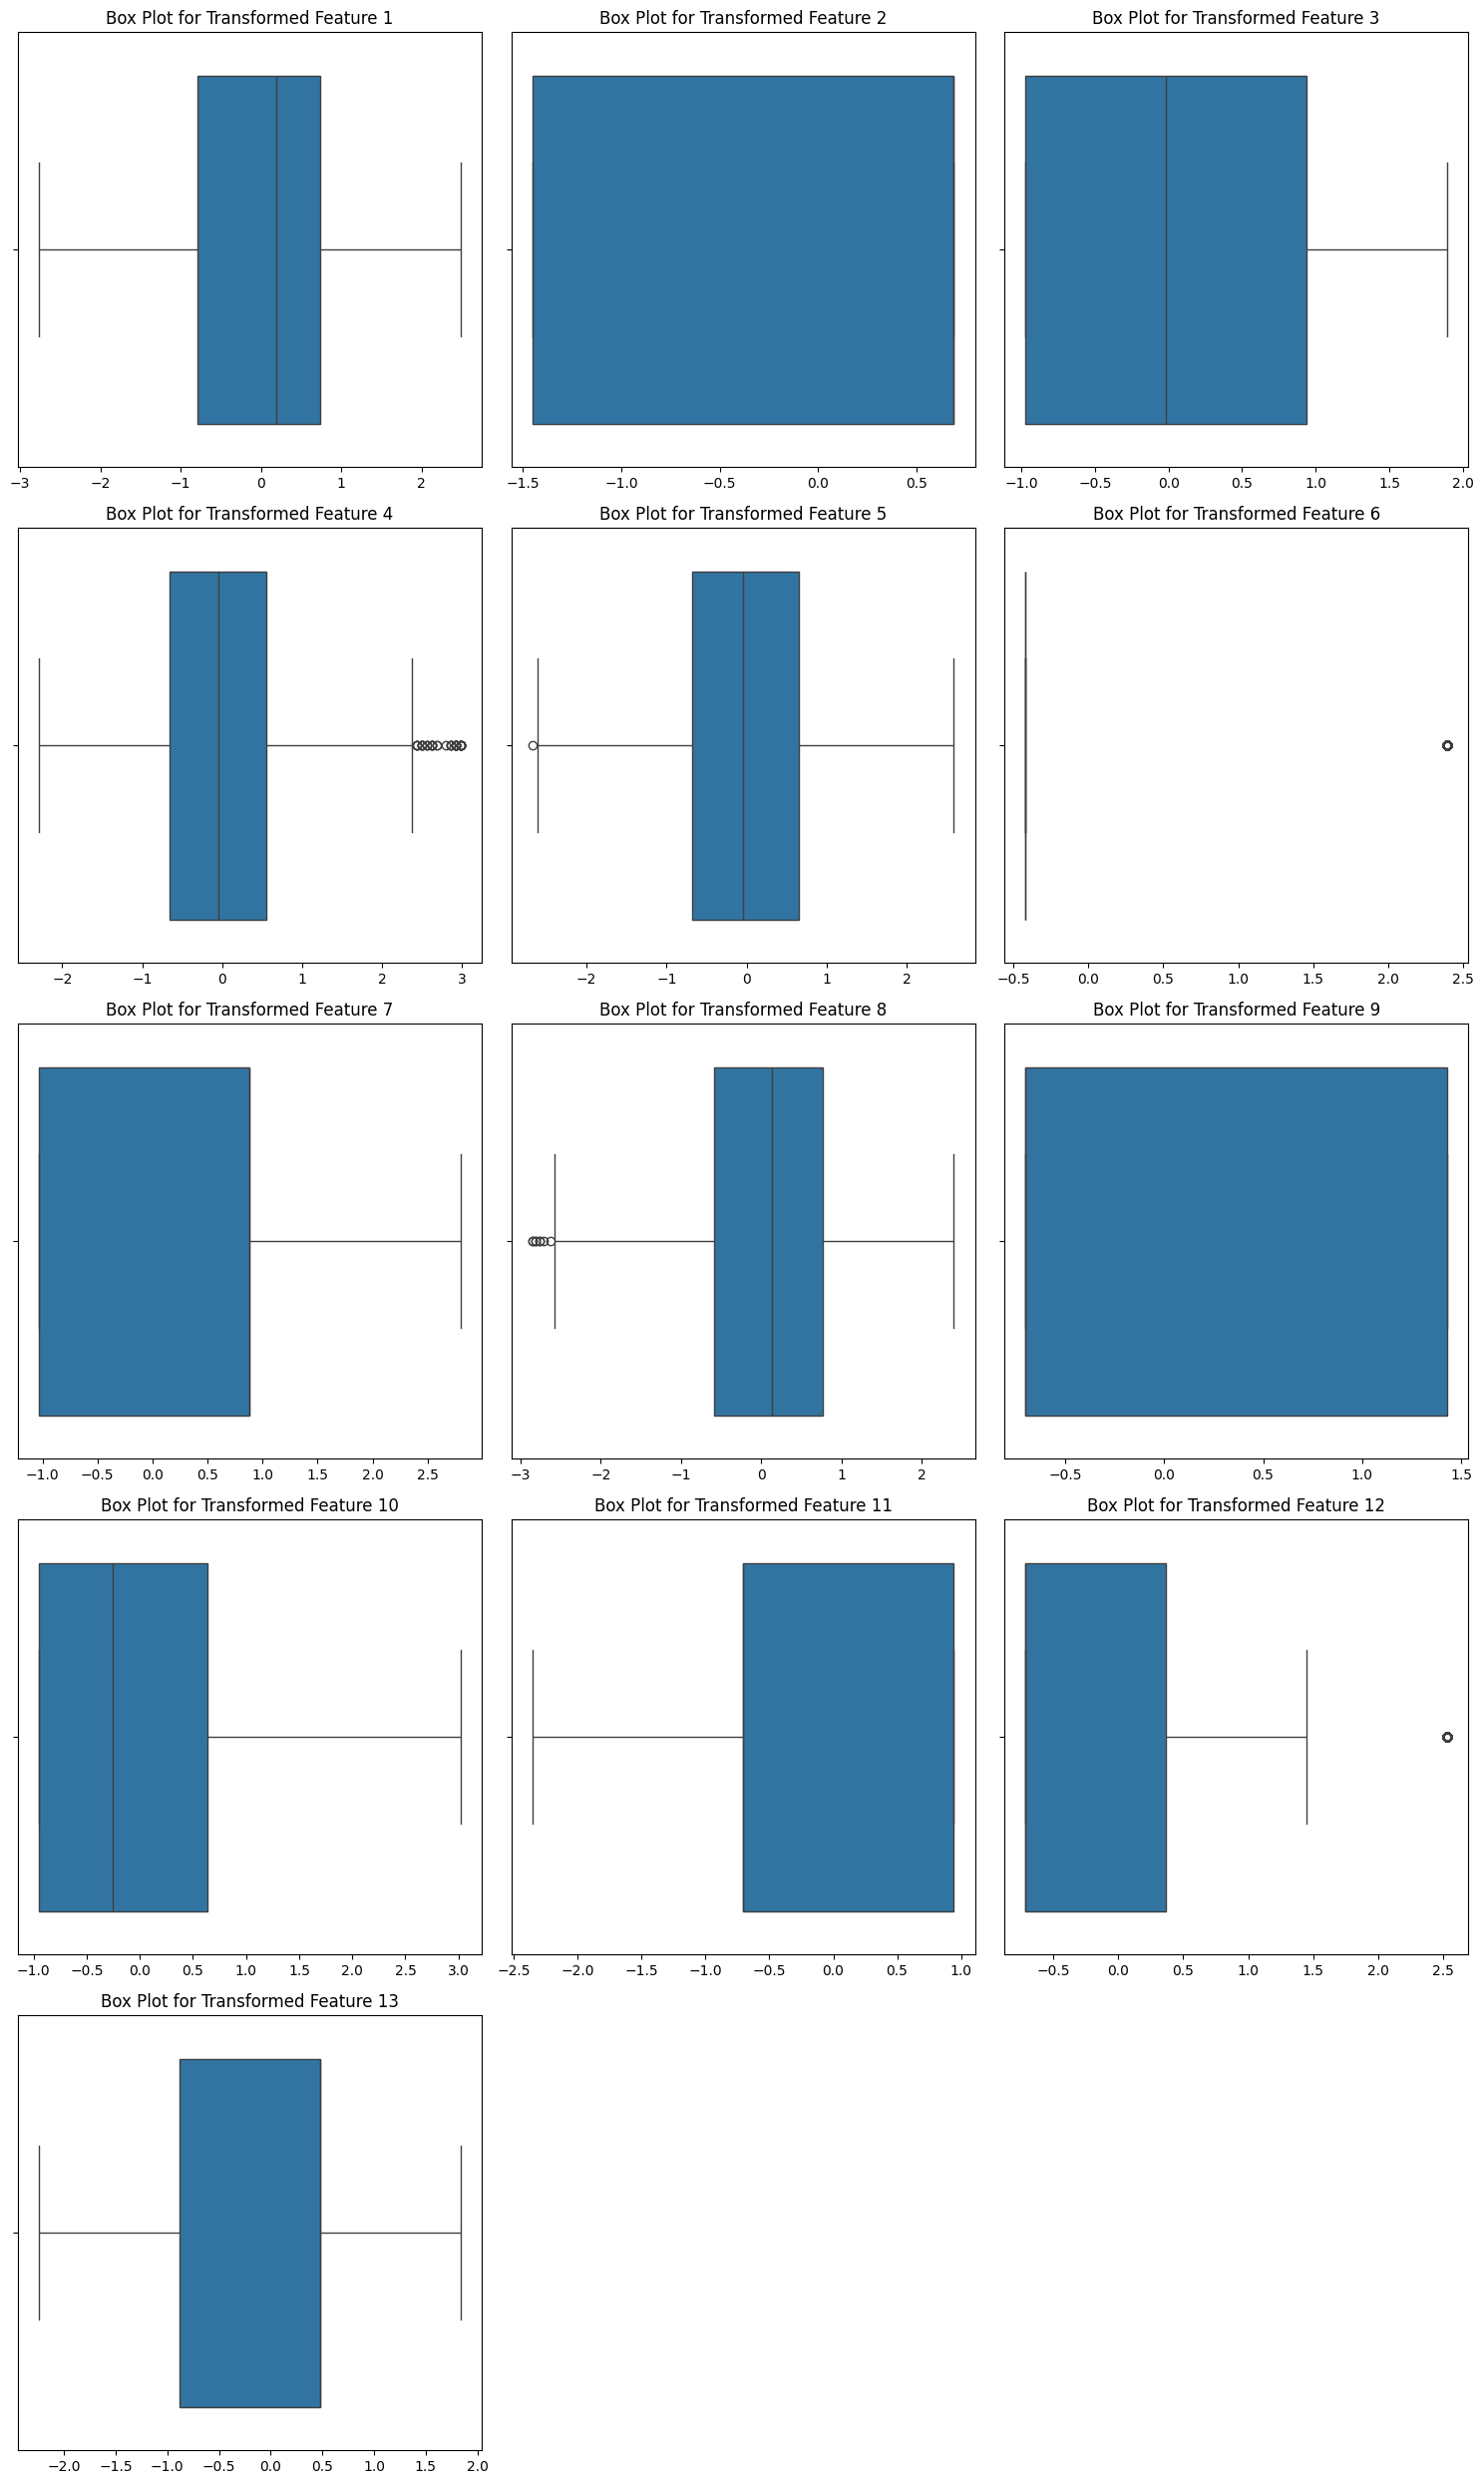

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from joblib import dump
import os
import logging

# Set up logging (optional, can be removed if not needed)
logging.basicConfig(level=logging.INFO)
MODEL_SAVE_PATH = "model/"
PREPROCESSOR_PATH = os.path.join(MODEL_SAVE_PATH, "preprocessor.joblib")

# Visualize outliers in one figure
def visualize_outliers(X):
    numerical_cols = X.select_dtypes(include=[np.number]).columns
    n = len(numerical_cols)
    rows = (n // 3) + (n % 3 > 0)
    cols = min(3, n)

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.boxplot(x=X[col], ax=axes[i])
        axes[i].set_title(f'Box Plot for {col}')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    sns.pairplot(X, plot_kws={'alpha': 0.5})
    plt.suptitle('Pair Plot for Feature Relationships', y=1.02)
    plt.show()

    for col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(X[col], kde=True)
        plt.title(f'Distribution Plot for {col}')
        plt.show()

def preprocess_data(df):
    X = df.drop('output', axis=1)
    y = df['output']
    visualize_outliers(X)

    z_scores = np.abs(stats.zscore(X))
    threshold = 3
    outliers = (z_scores > threshold).any(axis=1)

    outlier_count = outliers.sum()
    total_instances = len(X)
    logging.info(f"Detected {outlier_count} outliers out of {total_instances} instances. Removing outliers...")
    print(f"Detected {outlier_count} outliers out of {total_instances} instances. Removing outliers...")

    X_clean = X[~outliers]
    y_clean = y[~outliers]

    numerical_cols = X_clean.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = X_clean.select_dtypes(exclude=[np.number]).columns.tolist()

    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ]
    )

    preprocessor.fit(X_clean)

    if not os.path.exists(MODEL_SAVE_PATH):
        os.makedirs(MODEL_SAVE_PATH)
    dump(preprocessor, PREPROCESSOR_PATH)
    logging.info(f"Preprocessor saved to {PREPROCESSOR_PATH}")
    print(f"Preprocessor saved to {PREPROCESSOR_PATH}")

    X_transformed = preprocessor.transform(X_clean)
    logging.info(f"Transformed feature shape: {X_transformed.shape}")
    print(f"Transformed feature shape: {X_transformed.shape}")

    return X_transformed, y_clean

def visualize_transformed_outliers(X_transformed):
    n = X_transformed.shape[1]
    rows = (n // 3) + (n % 3 > 0)
    cols = min(3, n)

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for i in range(n):
        sns.boxplot(x=X_transformed[:, i], ax=axes[i])
        axes[i].set_title(f'Box Plot for Transformed Feature {i+1}')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Preprocess the data
X, y = preprocess_data(df)

# After preprocessing, call this function to visualize transformed data
visualize_transformed_outliers(X)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



Class imbalance handled using SMOTE.


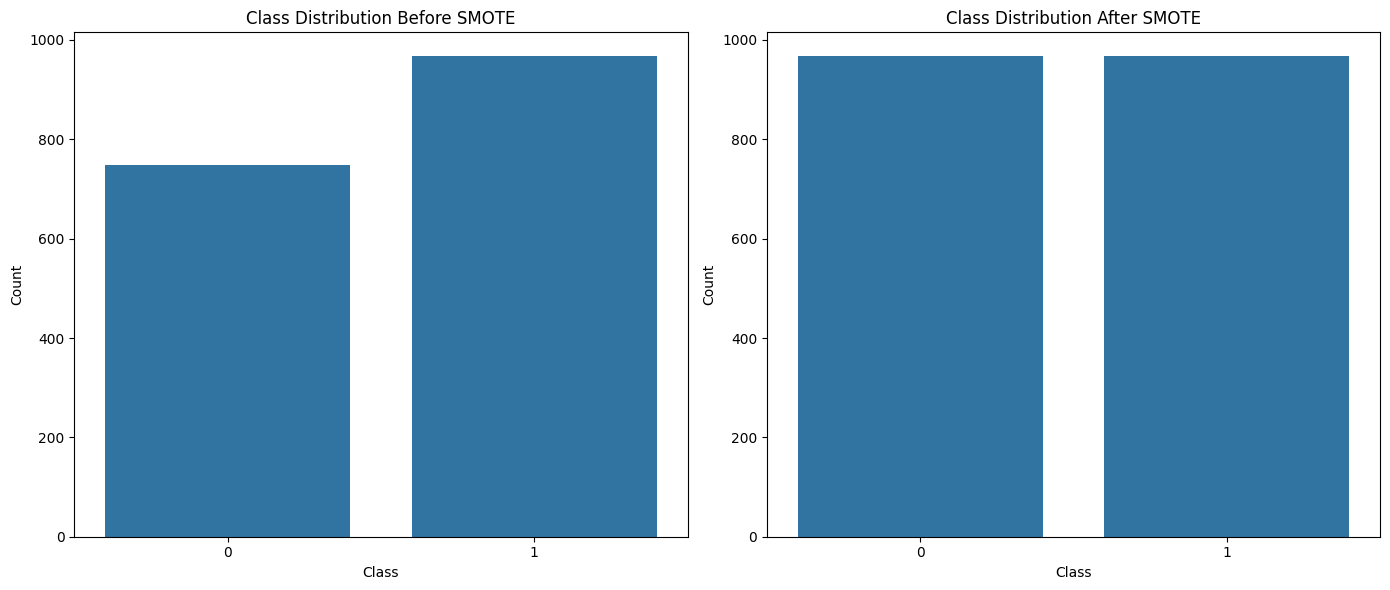

In [8]:
import logging
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Configuring logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def handle_class_imbalance(X_train, y_train):
    """
    Handle class imbalance by applying SMOTE (Synthetic Minority Over-sampling Technique) 
    to the training dataset to generate synthetic samples for the minority class.
    
    Parameters:
    X_train (pd.DataFrame or np.ndarray): Feature matrix for training data
    y_train (pd.Series or np.ndarray): Target vector for training data
    
    Returns:
    X_resampled (pd.DataFrame or np.ndarray): Resampled feature matrix
    y_resampled (pd.Series or np.ndarray): Resampled target vector
    """
    # Apply SMOTE to balance the classes
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Log and print the completion of SMOTE
    logging.info("Class imbalance handled using SMOTE.")
    print("Class imbalance handled using SMOTE.")

    # Optional: Visualize the class distribution before and after SMOTE
    plot_class_distribution(y_train, y_resampled)

    return X_resampled, y_resampled

def plot_class_distribution(y_train, y_resampled):
    """
    Plot the distribution of classes before and after SMOTE.
    
    Parameters:
    y_train (pd.Series or np.ndarray): Original target vector for training data
    y_resampled (pd.Series or np.ndarray): Resampled target vector after SMOTE
    """
    # Plot before SMOTE
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    sns.countplot(x=y_train, ax=axes[0])
    axes[0].set_title("Class Distribution Before SMOTE")
    axes[0].set_xlabel("Class")
    axes[0].set_ylabel("Count")
    
    # Plot after SMOTE
    sns.countplot(x=y_resampled, ax=axes[1])
    axes[1].set_title("Class Distribution After SMOTE")
    axes[1].set_xlabel("Class")
    axes[1].set_ylabel("Count")
    
    plt.tight_layout()
    plt.show()

# Handle class imbalance using SMOTE
X_train_resampled, y_train_resampled = handle_class_imbalance(X_train, y_train)


In [9]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (1716, 13)
y_train shape: (1716,)


In [10]:
# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Directory paths (ensure they are set up)
VISUALIZATION_PATH = 'visualizations'
MODEL_SAVE_PATH = 'models'

# Create the directories if they don't exist
os.makedirs(VISUALIZATION_PATH, exist_ok=True)
os.makedirs(MODEL_SAVE_PATH, exist_ok=True)

In [11]:


# Setup logging
logging.basicConfig(level=logging.INFO)

# Ensure visualization path exists
VISUALIZATION_PATH = 'path/to/your/visualizations'
os.makedirs(VISUALIZATION_PATH, exist_ok=True)

cv = StratifiedKFold(n_splits=10)

# Function to create and tune models
def create_and_tune_models(X_train, y_train, X_val=None, y_val=None):
    from sklearn.naive_bayes import GaussianNB, BernoulliNB

    models = {
        'random_forest': RandomForestClassifier(),
        'xgboost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'catboost': CatBoostClassifier(verbose=0),
        'lightgbm': LGBMClassifier(),
        'svc': SVC(probability=True),
        'logistic_regression': LogisticRegression(),
        'lasso_logistic': LogisticRegression(penalty='l1', solver='liblinear'),
        'lda': LinearDiscriminantAnalysis(),
        'adaboost': AdaBoostClassifier(),
        'extra_trees': ExtraTreesClassifier(),
        'hist_gradient_boosting': HistGradientBoostingClassifier(),
        'gaussian_nb': GaussianNB(),  # Add Gaussian Naive Bayes
        'bernoulli_nb': BernoulliNB()  # Add Bernoulli Naive Bayes
    }

    param_dist = {
        'random_forest': {
            'n_estimators': [100, 200, 300],
            'max_depth': [80, 90],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2']
        },
        'xgboost': {
            'n_estimators': [100, 200, 300],
            'max_depth': [80, 90],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'lambda': [0.1, 1, 10],  # L2 regularization
            'alpha': [0.1, 1, 10]  # L1 regularization
        },
        'catboost': {
            'iterations': [200, 300],
            'depth': [80, 90],
            'learning_rate': [0.01, 0.05, 0.1],
            'l2_leaf_reg': [1, 3, 5],
            'border_count': [32, 64],  # Number of splits for categorical features
            'task_type': ['CPU', 'GPU']  # Use GPU for faster training if available
        },
        'lightgbm': {
            'n_estimators': [100, 200, 300],
            'max_depth': [80, 90],
            'learning_rate': [0.01, 0.05, 0.1],
            'num_leaves': [20, 40, 60],
            'min_child_samples': [10, 20, 30],  # Prevent overfitting
            'min_data_in_leaf': [20, 30, 40]  # Prevent overfitting
        },
        'svc': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf','poly', 'sigmoid'],
            'gamma': ['scale', 'auto']
        },
        # In your create_and_tune_models function, adjust the 'C' parameter
        'logistic_regression': {
            'C': [0.01, 0.1, 1, 10],  # Explore lower values for stronger regularization
            'penalty': ['l2'] 
        },
        'lasso_logistic': {
            'C': [0.01, 0.1, 1, 10],  # Explore lower values for stronger regularization
            'penalty': ['l1'] 
        },
        'lda': {
            'solver': ['svd', 'lsqr', 'eigen']
        },
        'adaboost': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0]
        },
        'extra_trees': {
            'n_estimators': [100, 200, 300],
            'max_depth': [80, 90],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2']
        },
        'hist_gradient_boosting': {
            'max_iter': [300, 400, 500],
            'max_depth': [80, 90],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_leaf_nodes': [20, 40, 60]
        },
        'gaussian_nb': {
        'var_smoothing': [1e-9, 1e-8, 1e-7]  # Regularization to avoid division by zero
        },
        'bernoulli_nb': {
            'alpha': [0.1, 1.0, 10.0],  # Smoothing parameter
            'binarize': [0.0, 0.1, 0.5, 1.0]  # Threshold for binarizing features
        }
    }

    tuned_models = {}
    for name, model in models.items():
        try:
            logging.info(f"Tuning {name}...")
            start_time = time.time()
            search = RandomizedSearchCV(model, param_distributions=param_dist[name],
                                        n_iter=10, scoring='roc_auc', cv=cv, verbose=0, n_jobs=-1)
            search.fit(X_train, y_train)  # Fit the model using training data
            tuned_models[name] = search.best_estimator_

            # Early Stopping for XGBoost, LightGBM (if X_val and y_val are provided)
            if name == 'xgboost' or name == 'lightgbm':
                if X_val is not None and y_val is not None:
                    search.best_estimator_.fit(X_train, y_train, 
                                               eval_set=[(X_val, y_val)], 
                                               early_stopping_rounds=10, verbose=False)

            elapsed_time = time.time() - start_time
            logging.info(f"Best parameters for {name}: {search.best_params_} (Tuning time: {elapsed_time:.2f}s)")

        except Exception as e:
            logging.error(f"Error tuning model {name}: {e}")

    return tuned_models

# Ensure you have the correct training data (X_train, y_train)


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
    else:
        y_pred_proba = np.zeros((y_pred.shape[0], 2))  # Placeholder if predict_proba isn't available

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1 Score': f1_score(y_test, y_pred, average='macro'),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba[:, 1]) if hasattr(model, "predict_proba") else None,
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'ROC Curve': roc_curve(y_test, y_pred_proba[:, 1]) if hasattr(model, "predict_proba") else None,
        'Precision-Recall Curve': precision_recall_curve(y_test, y_pred_proba[:, 1]) if hasattr(model, "predict_proba") else None
    }
    return metrics

def evaluate_models(models, X_test, y_test):
    evaluation_results = {}
    for name, model in models.items():
        logging.info(f"Evaluating {name}...")
        metrics = evaluate_model(model, X_test, y_test)

        log_metrics = {
            'Accuracy': metrics['Accuracy'],
            'Precision': metrics['Precision'],
            'Recall': metrics['Recall'],
            'F1 Score': metrics['F1 Score'],
            'ROC AUC': metrics['ROC AUC']
        }
        
        logging.info(f"Model: {name}, Accuracy: {log_metrics['Accuracy']:.4f}, "
                     f"Precision: {log_metrics['Precision']:.4f}, Recall: {log_metrics['Recall']:.4f}, "
                     f"F1 Score: {log_metrics['F1 Score']:.4f}, "
                     f"ROC AUC: {log_metrics['ROC AUC']:.4f}" if log_metrics['ROC AUC'] is not None else 
                     f"Model: {name}, Accuracy: {log_metrics['Accuracy']:.4f}, "
                     f"Precision: {log_metrics['Precision']:.4f}, Recall: {log_metrics['Recall']:.4f}, "
                     f"F1 Score: {log_metrics['F1 Score']:.4f}, ROC AUC: Not Available")

        evaluation_results[name] = metrics

        # Save confusion matrix visualization
        cm = metrics['Confusion Matrix']
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.grid(False)  # Disable grid
        plt.savefig(os.path.join(VISUALIZATION_PATH, f'confusion_matrix_{name}.png'))
        plt.close()

        # Save ROC curve visualization if available
        if metrics['ROC Curve'] is not None:
            fpr, tpr, _ = metrics['ROC Curve']
            plt.figure(figsize=(6, 4))
            plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {metrics["ROC AUC"]:.4f})')
            plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
            plt.title(f'ROC Curve for {name}')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.grid(True)  # Enable grid for better readability
            plt.legend(loc='lower right')
            plt.savefig(os.path.join(VISUALIZATION_PATH, f'roc_curve_{name}.png'))
            plt.close()

        # Save Precision-Recall curve visualization if available
        if metrics['Precision-Recall Curve'] is not None:
            precision, recall, _ = metrics['Precision-Recall Curve']
            plt.figure(figsize=(6, 4))
            plt.plot(recall, precision, marker='o')
            plt.title(f'Precision-Recall Curve for {name}')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.grid(True)  # Enable grid for better readability
            plt.savefig(os.path.join(VISUALIZATION_PATH, f'precision_recall_curve_{name}.png'))
            plt.close()
            
    return evaluation_results


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import os
import logging

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
    else:
        y_pred_proba = np.zeros((y_pred.shape[0], 2))  # Placeholder if predict_proba isn't available

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1 Score': f1_score(y_test, y_pred, average='macro'),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba[:, 1]) if hasattr(model, "predict_proba") else None,
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'ROC Curve': roc_curve(y_test, y_pred_proba[:, 1]) if hasattr(model, "predict_proba") else None,
        'Precision-Recall Curve': precision_recall_curve(y_test, y_pred_proba[:, 1]) if hasattr(model, "predict_proba") else None
    }
    return metrics

def evaluate_models(models, X_test, y_test):
    evaluation_results = {}
    for name, model in models.items():
        logging.info(f"Evaluating {name}...")
        metrics = evaluate_model(model, X_test, y_test)

        log_metrics = {
            'Accuracy': metrics['Accuracy'],
            'Precision': metrics['Precision'],
            'Recall': metrics['Recall'],
            'F1 Score': metrics['F1 Score'],
            'ROC AUC': metrics['ROC AUC']
        }
        
        logging.info(f"Model: {name}, Accuracy: {log_metrics['Accuracy']:.4f}, "
                     f"Precision: {log_metrics['Precision']:.4f}, Recall: {log_metrics['Recall']:.4f}, "
                     f"F1 Score: {log_metrics['F1 Score']:.4f}, "
                     f"ROC AUC: {log_metrics['ROC AUC']:.4f}" if log_metrics['ROC AUC'] is not None else 
                     f"Model: {name}, Accuracy: {log_metrics['Accuracy']:.4f}, "
                     f"Precision: {log_metrics['Precision']:.4f}, Recall: {log_metrics['Recall']:.4f}, "
                     f"F1 Score: {log_metrics['F1 Score']:.4f}, ROC AUC: Not Available")

        evaluation_results[name] = metrics

        # Plot all metrics in a single figure (1 row, 3 columns)
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust size as needed
        fig.suptitle(f'Model Performance: {name}', fontsize=16)

        # Confusion Matrix Plot
        cm = metrics['Confusion Matrix']
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
        axes[0].set_title('Confusion Matrix')
        axes[0].set_xlabel('Predicted')
        axes[0].set_ylabel('Actual')
        axes[0].grid(False)  # Disable grid

        # ROC Curve Plot if available
        if metrics['ROC Curve'] is not None:
            fpr, tpr, _ = metrics['ROC Curve']
            axes[1].plot(fpr, tpr, label=f'ROC Curve (AUC = {metrics["ROC AUC"]:.4f})')
            axes[1].plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
            axes[1].set_title('ROC Curve')
            axes[1].set_xlabel('False Positive Rate')
            axes[1].set_ylabel('True Positive Rate')
            axes[1].grid(True)  # Enable grid
            axes[1].legend(loc='lower right')

        # Precision-Recall Curve Plot if available
        if metrics['Precision-Recall Curve'] is not None:
            precision, recall, _ = metrics['Precision-Recall Curve']
            axes[2].plot(recall, precision, marker='o')
            axes[2].set_title('Precision-Recall Curve')
            axes[2].set_xlabel('Recall')
            axes[2].set_ylabel('Precision')
            axes[2].grid(True)  # Enable grid

        # Save the combined figure
        plt.tight_layout()
        plt.subplots_adjust(top=0.85)  # Adjust top for title
        plt.savefig(os.path.join(VISUALIZATION_PATH, f'{name}_performance.png'))
        plt.close()

    return evaluation_results



[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Info] Number of positive: 967, number of negative: 749
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 1716, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.563520 -> initscore=0.255460
[LightGBM] [Info] Start training from score 0.255460
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\projects\\Heart_Attack_Prediction\\path\\to\\your\\visualizations\\random_forest_performance.png'

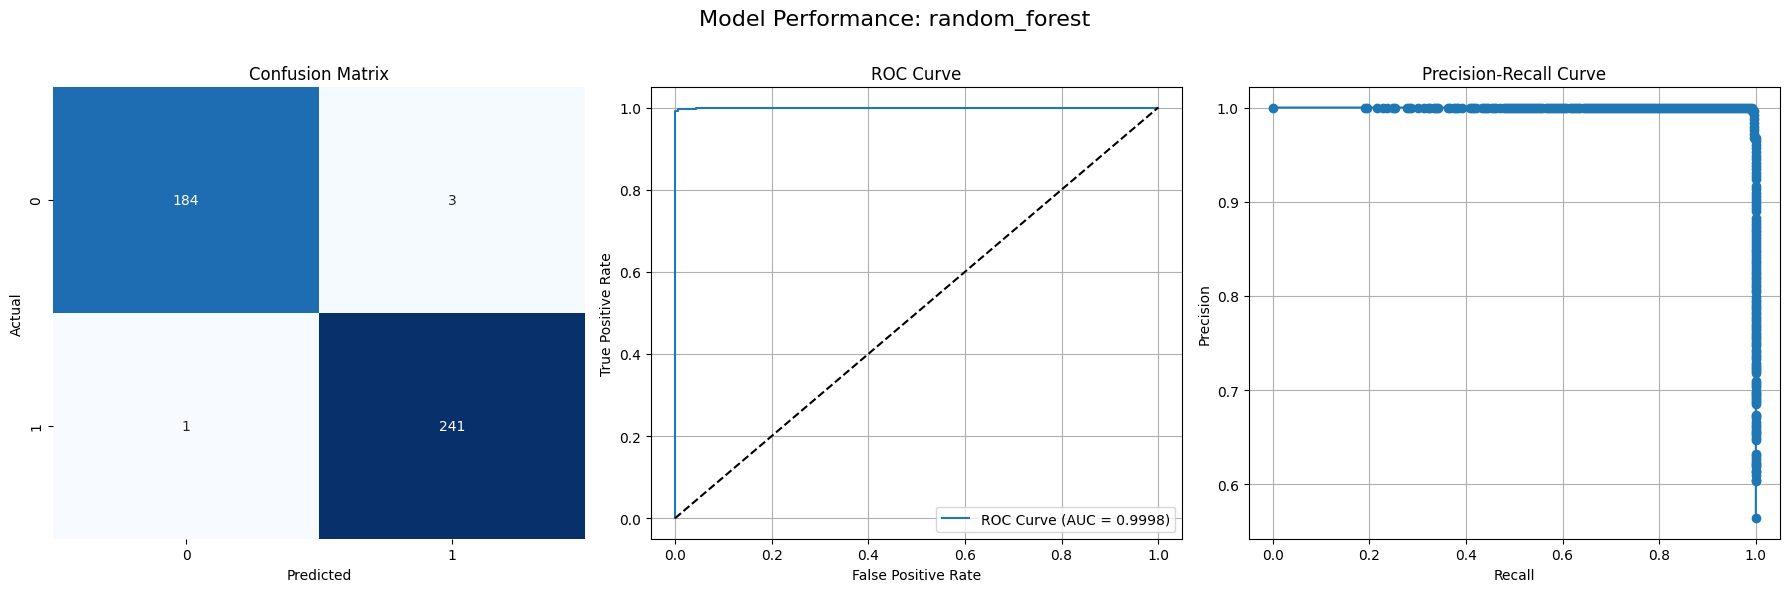

In [13]:
# Function to create a voting classifier
def create_voting_classifier(tuned_models, voting_type='soft'):
    estimators = [(name, model) for name, model in tuned_models.items()]
    return VotingClassifier(estimators=estimators, voting=voting_type)

# Function to create a stacking classifier
def create_stacking_classifier(tuned_models, final_estimator=CatBoostClassifier(verbose=0)):
    estimators = [(name, model) for name, model in tuned_models.items()]
    return StackingClassifier(estimators=estimators, final_estimator=final_estimator)

# Define ensemble strategy functions with optional parameters
def create_boosting_classifier(params=None):
    return GradientBoostingClassifier(**(params or {}))

def create_bagging_classifier(estimator=RandomForestClassifier(), params=None):
    return BaggingClassifier(estimator=estimator, **(params or {}))

# Function to fit and evaluate a model
def fit_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name, results_dict):
    try:
        model.fit(X_train, y_train)
        metrics = evaluate_model(model, X_test, y_test)  # Assumes evaluate_model returns metrics
        results_dict[model_name] = metrics
        logging.info(f"Model: {model_name}, Metrics: {metrics}")
    except Exception as e:
        logging.error(f"Error fitting model {model_name}: {e}")

# Assuming X_train, X_test, y_train, and y_test are defined
tuned_models = create_and_tune_models(X_train, y_train)  # Creates and tunes base models
evaluate_results = evaluate_models(tuned_models, X_test, y_test)  # Evaluate individual base models

# Ensemble models
stacking_classifier = create_stacking_classifier(tuned_models, final_estimator=LogisticRegression())
boosting_clf = create_boosting_classifier()
bagging_clf = create_bagging_classifier(estimator=RandomForestClassifier())
voting_clf_soft = create_voting_classifier(tuned_models, voting_type='soft')
voting_clf_hard = create_voting_classifier(tuned_models, voting_type='hard')

# Evaluate ensemble models
for model_name, model in {
    'stacking_classifier': stacking_classifier,
    'boosting_classifier': boosting_clf,
    'bagging_classifier': bagging_clf,
    'voting_classifier_soft': voting_clf_soft,
    'voting_classifier_hard': voting_clf_hard
}.items():
    fit_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name, evaluate_results)

# Function to save models in a single call
def save_models(models_dict, save_path='path_to_save_models'):
    os.makedirs(save_path, exist_ok=True)
    for name, model in models_dict.items():
        dump(model, os.path.join(save_path, f'{name}.joblib'))
        logging.info(f"Saved model: {name} at {save_path}")

# Save individual and ensemble models
save_models({**tuned_models, 'stacking_classifier': stacking_classifier,
             'boosting_classifier': boosting_clf, 'bagging_classifier': bagging_clf,
             'voting_classifier_soft': voting_clf_soft, 'voting_classifier_hard': voting_clf_hard})


evalution

In [ ]:
from sklearn.model_selection import learning_curve



Generating learning curve for random_forest...


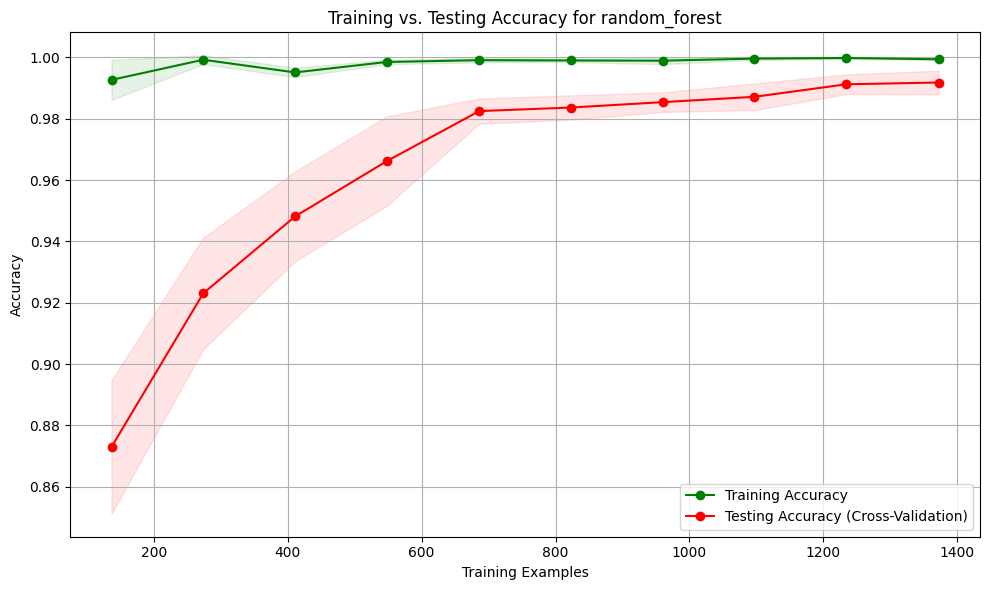

Learning curve for random_forest generated.

Generating learning curve for xgboost...


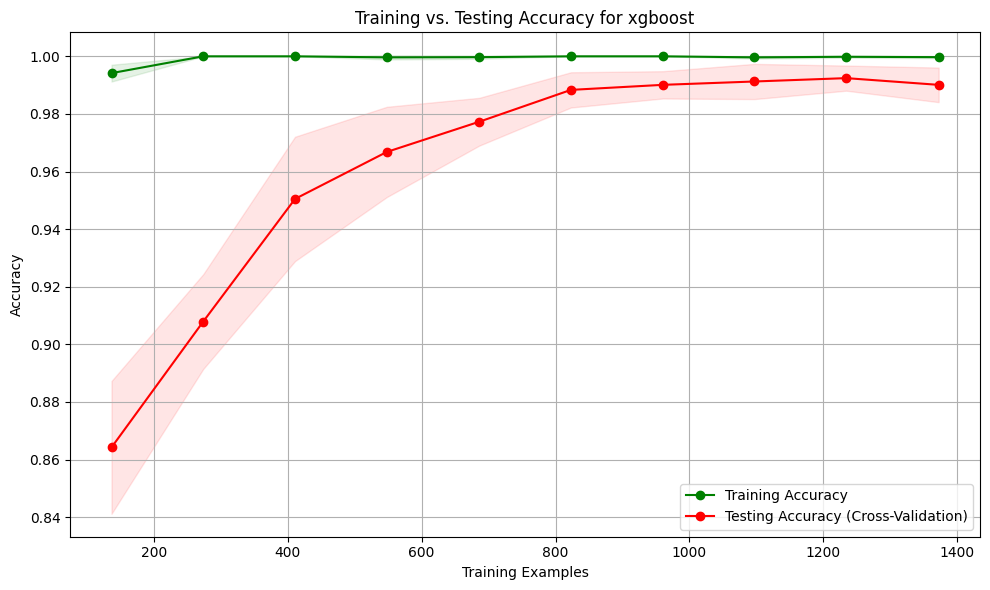

Learning curve for xgboost generated.

Generating learning curve for lightgbm...


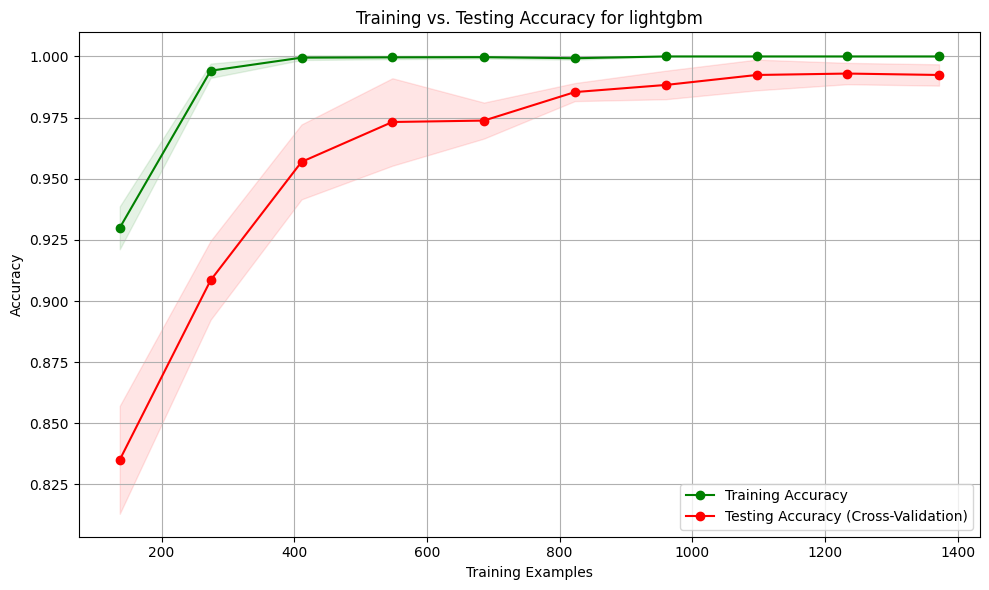

Learning curve for lightgbm generated.

Generating learning curve for svc...


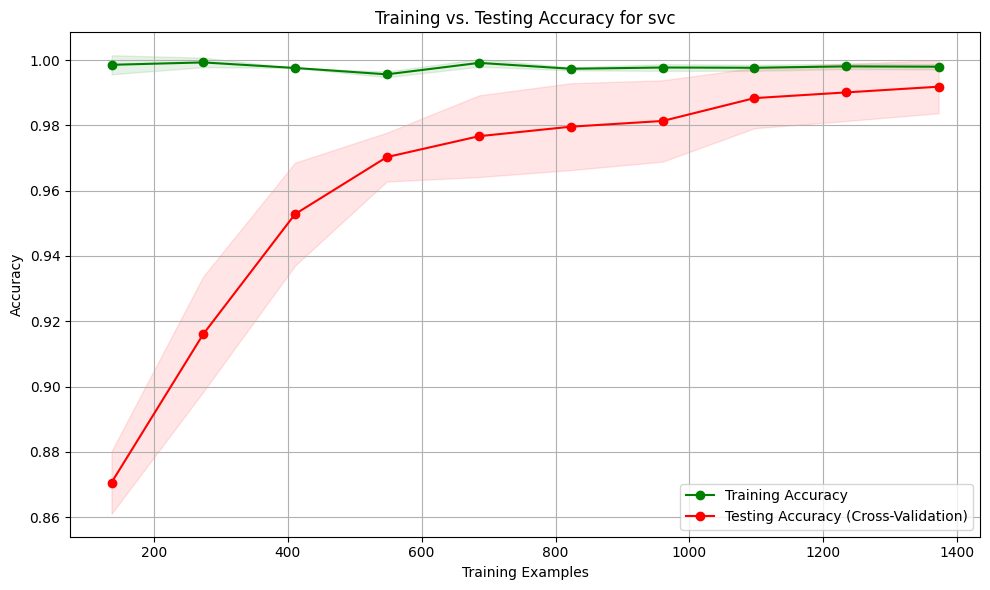

Learning curve for svc generated.

Generating learning curve for logistic_regression...


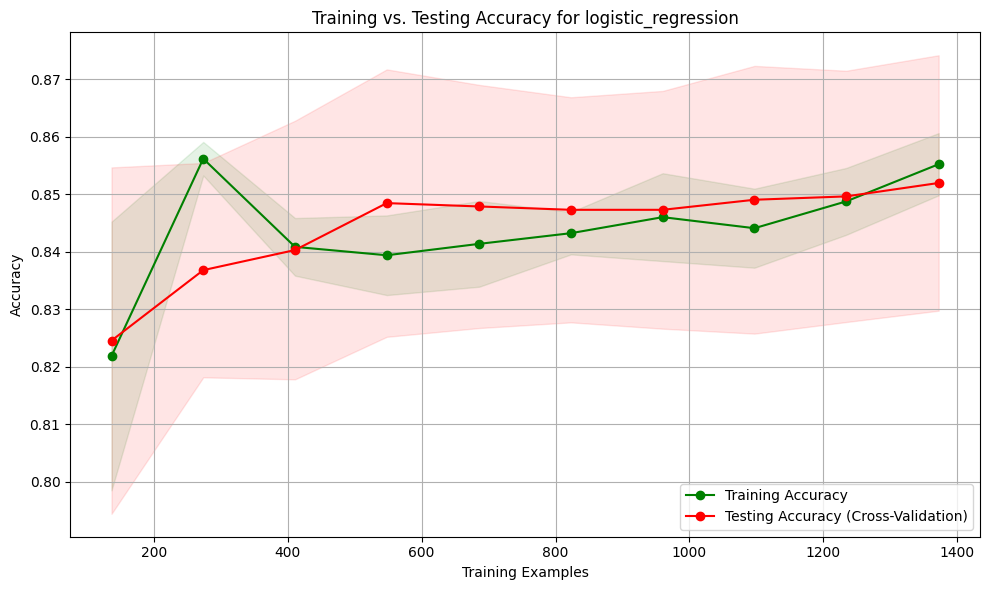

Learning curve for logistic_regression generated.

Generating learning curve for lasso_logistic...


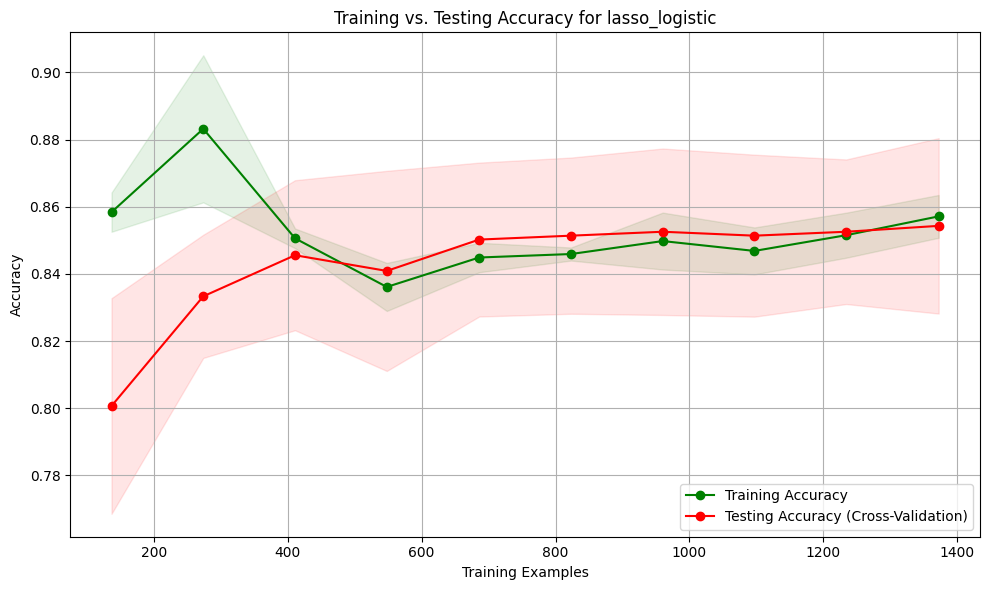

Learning curve for lasso_logistic generated.

Generating learning curve for lda...


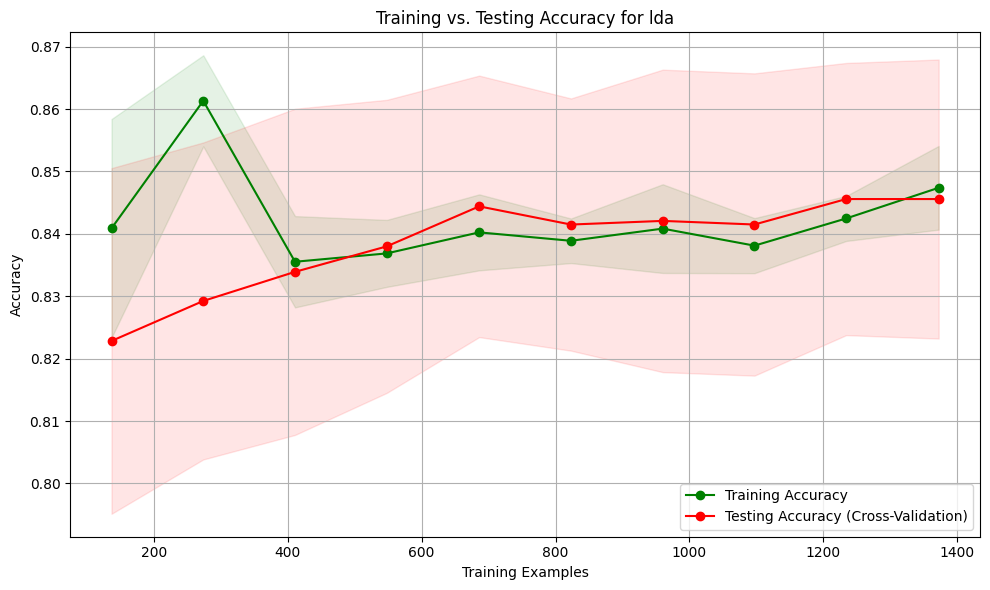

Learning curve for lda generated.

Generating learning curve for adaboost...


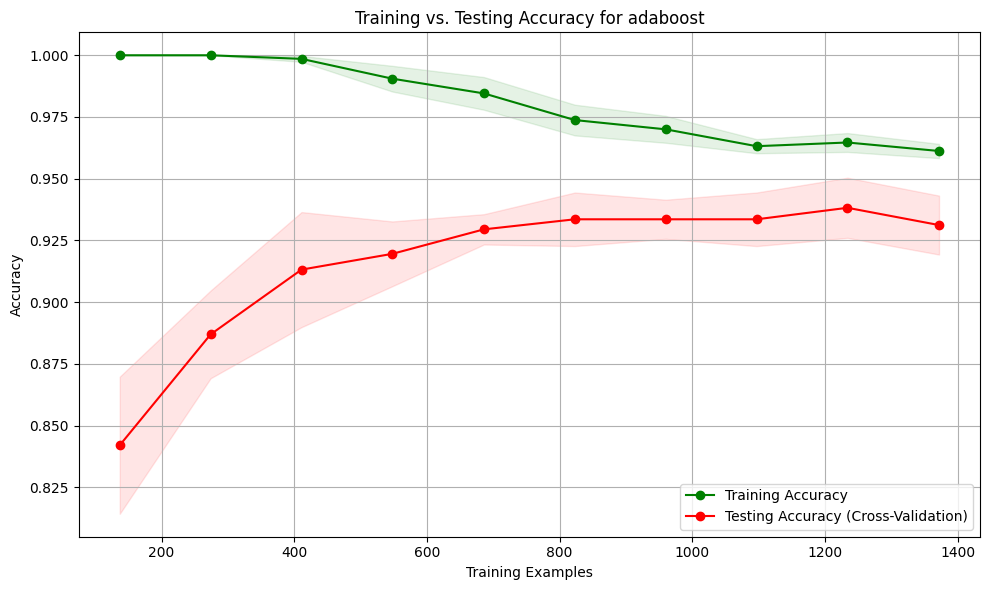

Learning curve for adaboost generated.

Generating learning curve for extra_trees...


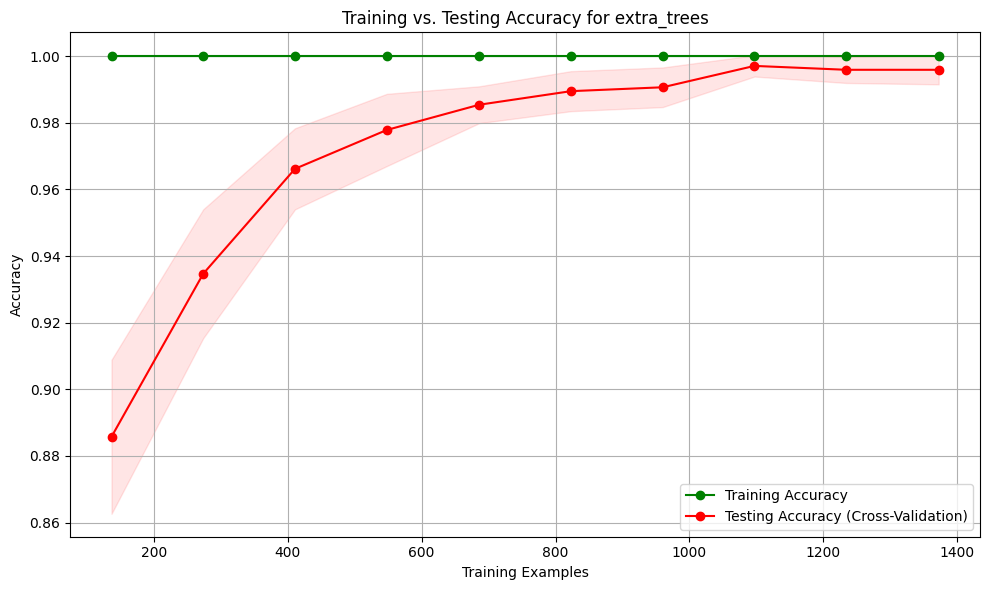

Learning curve for extra_trees generated.

Generating learning curve for hist_gradient_boosting...


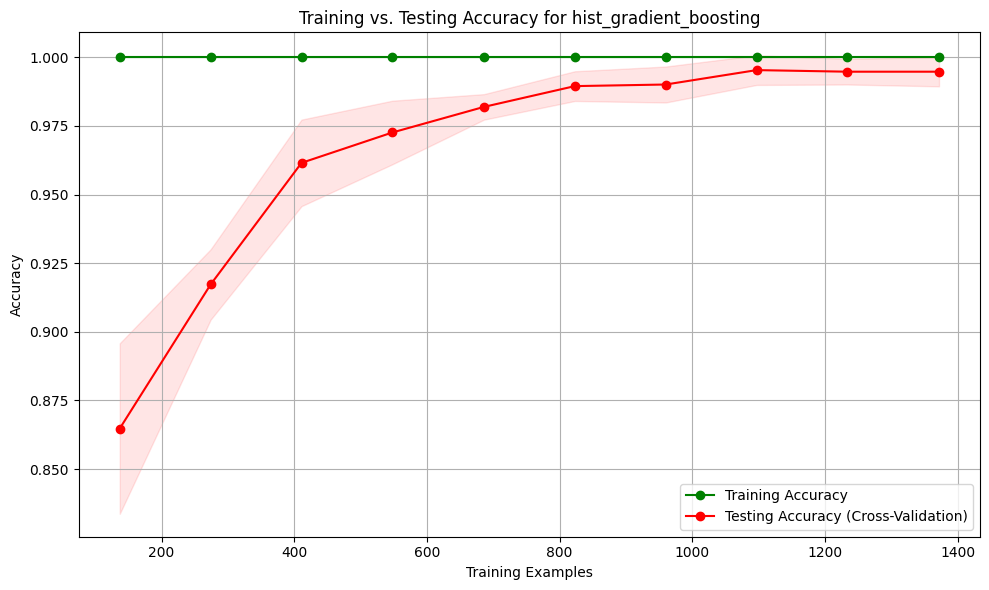

Learning curve for hist_gradient_boosting generated.

Generating learning curve for gaussian_nb...


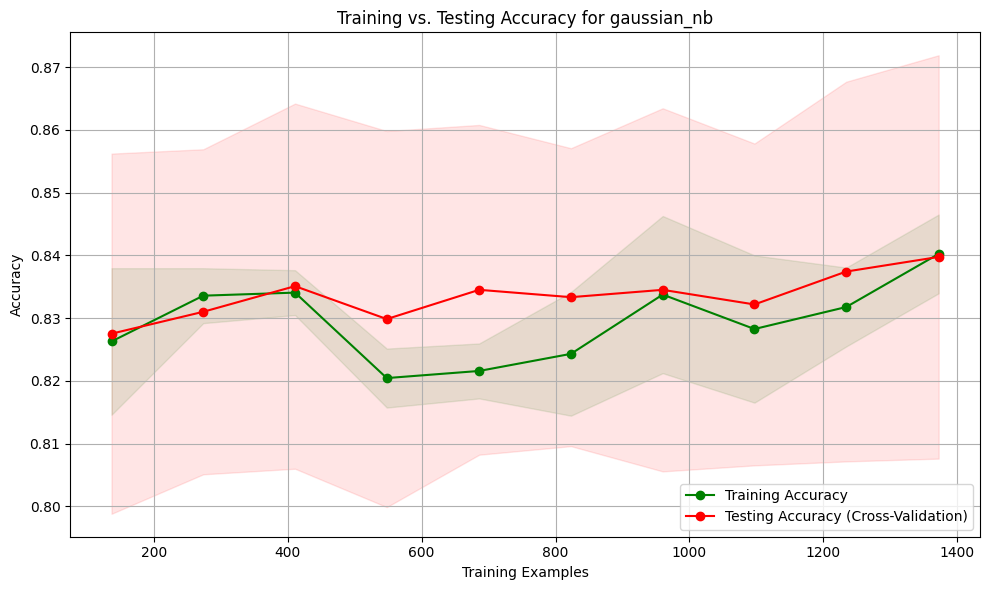

Learning curve for gaussian_nb generated.

Generating learning curve for bernoulli_nb...


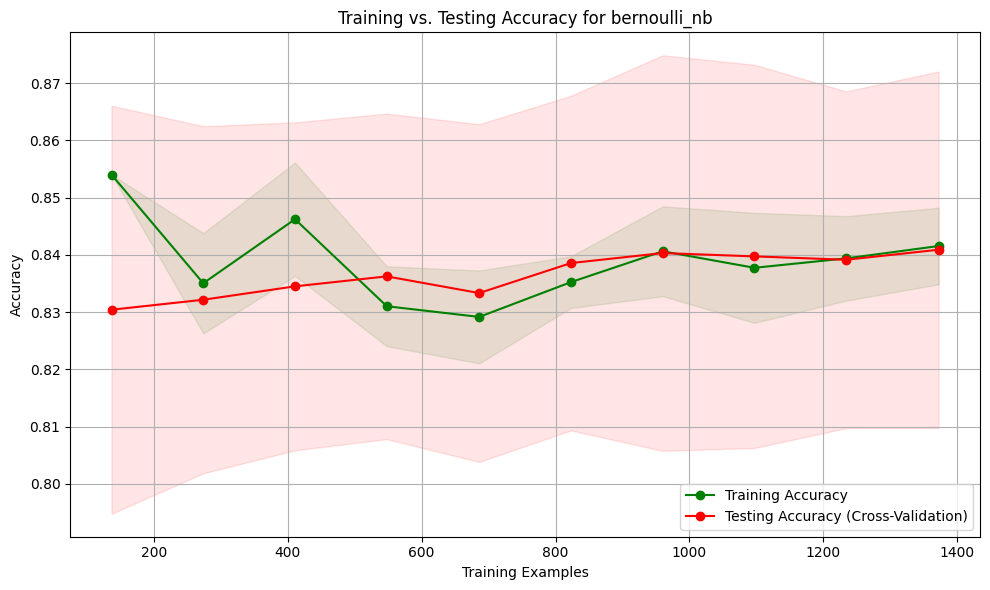

Learning curve for bernoulli_nb generated.


In [ ]:

def plot_training_vs_testing_accuracy(estimator, X_train, y_train, model_name, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )

    # Calculate mean and standard deviation for training and cross-validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='green', label='Training Accuracy')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Testing Accuracy (Cross-Validation)')

    # Fill between for standard deviation
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='green')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='red')

    # Graph labels and title
    plt.title(f'Training vs. Testing Accuracy for {model_name}')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)  # Enable grid for better readability
    plt.tight_layout()

    # Save the plot
    plt.savefig(os.path.join(VISUALIZATION_PATH, f'training_vs_testing_accuracy_{model_name}.png'))
    plt.show()

# Call this function for each tuned model and print outputs in one block
for model_name, model in tuned_models.items():
    print(f"\nGenerating learning curve for {model_name}...")
    plot_training_vs_testing_accuracy(model, X_train, y_train, model_name)
    print(f"Learning curve for {model_name} generated.")


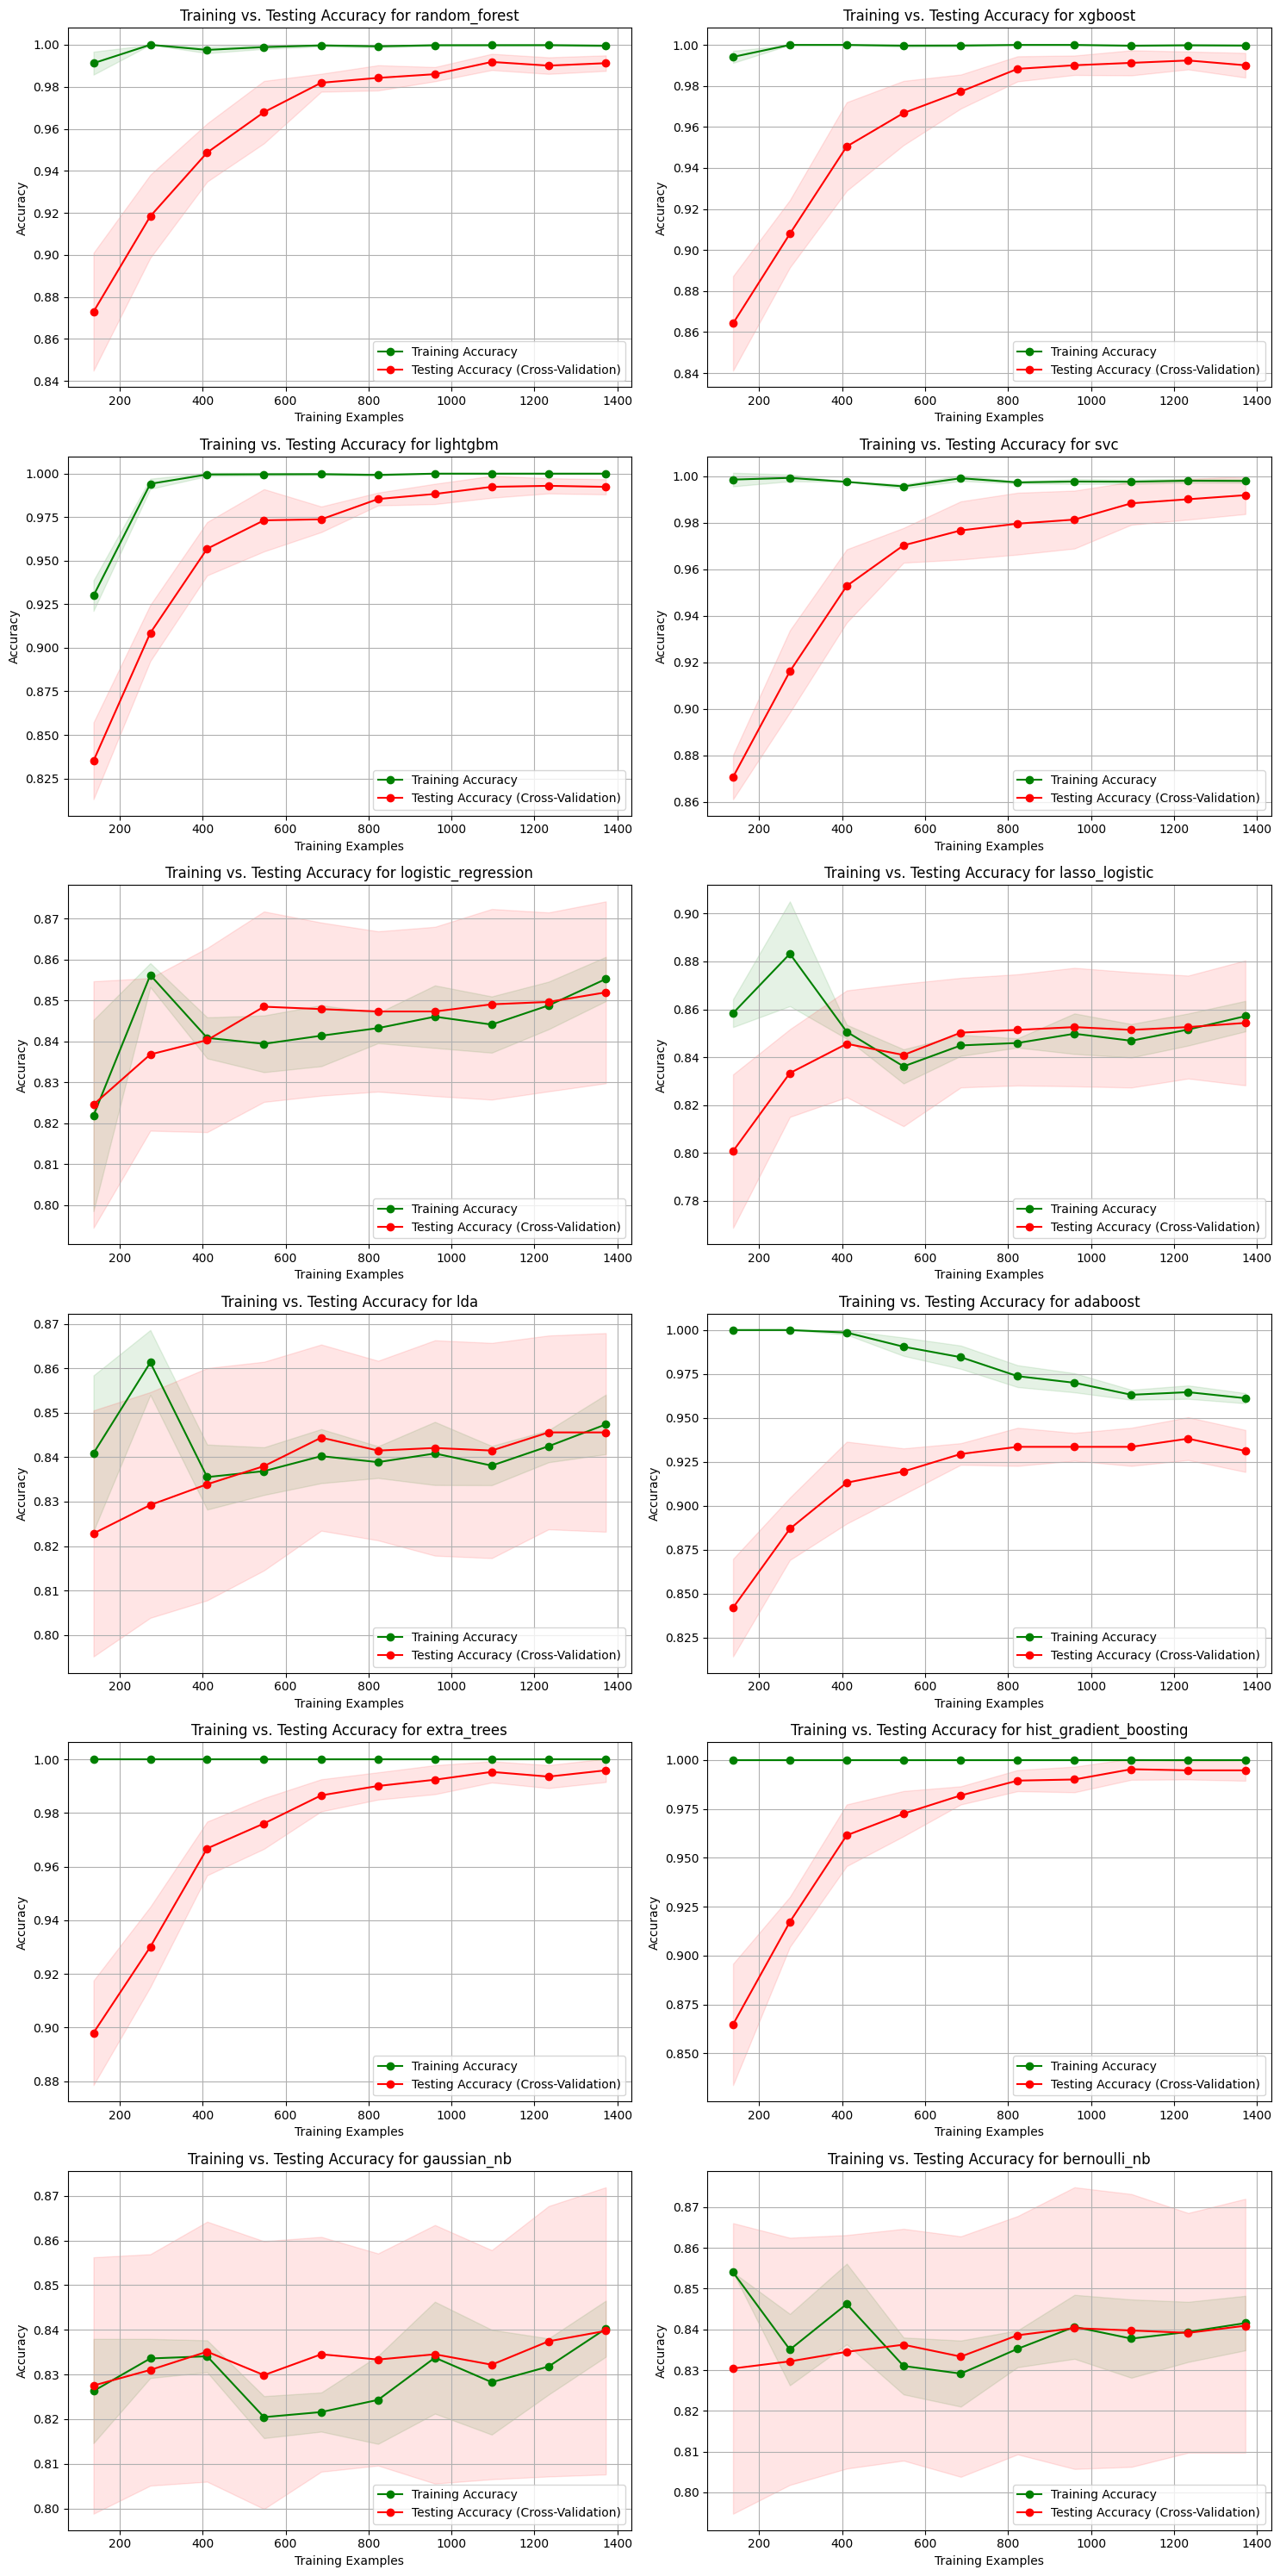

In [ ]:
def plot_training_vs_testing_accuracy_combined(tuned_models, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Plots training and testing accuracy graphs for all models in a single image.
    """
    num_models = len(tuned_models)
    fig, axes = plt.subplots(nrows=(num_models + 1) // 2, ncols=2, figsize=(15, 5 * ((num_models + 1) // 2)))
    axes = axes.flatten()

    for idx, (model_name, model) in enumerate(tuned_models.items()):
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
        )

        # Calculate mean and standard deviation for training and cross-validation scores
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        # Plot the learning curve for each model
        axes[idx].plot(train_sizes, train_scores_mean, 'o-', color='green', label='Training Accuracy')
        axes[idx].plot(train_sizes, test_scores_mean, 'o-', color='red', label='Testing Accuracy (Cross-Validation)')

        # Fill between for standard deviation
        axes[idx].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='green')
        axes[idx].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='red')

        # Graph labels and title
        axes[idx].set_title(f'Training vs. Testing Accuracy for {model_name}')
        axes[idx].set_xlabel('Training Examples')
        axes[idx].set_ylabel('Accuracy')
        axes[idx].legend(loc='lower right')
        axes[idx].grid(True)  # Enable grid for better readability

    # Adjust layout
    plt.tight_layout()

    # Save the combined plot
    combined_image_path = os.path.join(VISUALIZATION_PATH, 'combined_training_vs_testing_accuracy.png')
    plt.savefig(combined_image_path)
    plt.show()

# Call this function for all tuned models
plot_training_vs_testing_accuracy_combined(tuned_models, X_train, y_train)

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay


def model_comparison(evaluation_results):
    """
    Compare model performance metrics and save visualizations.
    
    Parameters:
    evaluation_results (dict): Dictionary with model names as keys and evaluation metrics as values.
    """
    # Ensure only the required metrics are included in the DataFrame
    required_columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
    comparison_df = pd.DataFrame(evaluation_results).T[required_columns]  # Transpose to have models as rows and filter columns

    # Check for missing required metrics
    for col in required_columns:
        if col not in comparison_df.columns:
            raise ValueError(f"Missing required metric '{col}' in evaluation results.")

    # Sort models by ROC AUC
    comparison_df = comparison_df.sort_values(by='Recall', ascending=False)

    # Display the DataFrame as a formatted table
    print("\nModel Performance Comparison:")
    display(comparison_df)

    # Save the DataFrame as a LaTeX table image (for research paper use)
    latex_path = os.path.join(VISUALIZATION_PATH, 'model_performance_comparison_table.tex')
    comparison_df.style.set_caption("Model Performance Comparison").to_latex(buf=latex_path)

model_comparison(evaluate_results)



Model Performance Comparison:


Accuracy Precision    Recall  F1 Score   ROC AUC
extra_trees             0.997669   0.99734  0.997934  0.997631  0.999934
lightgbm                0.997669   0.99734  0.997934  0.997631  0.999867
stacking_classifier     0.997669   0.99734  0.997934  0.997631  0.999867
hist_gradient_boosting  0.997669   0.99734  0.997934  0.997631  0.999956
xgboost                 0.995338   0.99526   0.99526   0.99526  0.999403
svc                     0.990676   0.99052   0.99052   0.99052  0.999624
random_forest           0.988345  0.989119  0.987239  0.988128  0.999867
bagging_classifier      0.986014  0.987105  0.984565  0.985744  0.999735
voting_classifier_soft  0.983683  0.984361  0.982499  0.983379  0.998586
voting_classifier_hard   0.97669  0.975037  0.978123  0.976382      None
boosting_classifier     0.960373  0.962868  0.956976  0.959471  0.992244
adaboost                0.920746  0.921003  0.917598   0.91911  0.975803
bernoulli_nb            0.839161  0.838562  0.833131  0.835262  0.894683
gaussian_nb             0.834499  0.834314  0.827783  0.830233  0.894352
lasso_logistic          0.799534  0.798824  0.791322  0.793888  0.897887
logistic_regression     0.799534  0.799408  0.790715  0.793556  0.898219
lda                     0.797203  0.799452  0.786218  0.789896  0.898771


Model Performance Comparison:


Accuracy Precision    Recall  F1 Score   ROC AUC  \
hist_gradient_boosting  0.997669   0.99734  0.997934  0.997631  0.999956   
extra_trees             0.997669   0.99734  0.997934  0.997631  0.999934   
random_forest           0.988345  0.989119  0.987239  0.988128  0.999867   
stacking_classifier     0.997669   0.99734  0.997934  0.997631  0.999867   
lightgbm                0.997669   0.99734  0.997934  0.997631  0.999867   
bagging_classifier      0.986014  0.987105  0.984565  0.985744  0.999735   
svc                     0.990676   0.99052   0.99052   0.99052  0.999624   
xgboost                 0.995338   0.99526   0.99526   0.99526  0.999403   
voting_classifier_soft  0.983683  0.984361  0.982499  0.983379  0.998586   
boosting_classifier     0.960373  0.962868  0.956976  0.959471  0.992244   
adaboost                0.920746  0.921003  0.917598   0.91911  0.975803   
lda                     0.797203  0.799452  0.786218  0.789896  0.898771   
logistic_regression     0.799534  0.799408  0.790715  0.793556  0.898219   
lasso_logistic          0.799534  0.798824  0.791322  0.793888  0.897887   
bernoulli_nb            0.839161  0.838562  0.833131  0.835262  0.894683   
gaussian_nb             0.834499  0.834314  0.827783  0.830233  0.894352   
voting_classifier_hard   0.97669  0.975037  0.978123  0.976382      None   

                              Confusion Matrix  \
hist_gradient_boosting    [[187, 0], [1, 241]]   
extra_trees               [[187, 0], [1, 241]]   
random_forest             [[183, 4], [1, 241]]   
stacking_classifier       [[187, 0], [1, 241]]   
lightgbm                  [[187, 0], [1, 241]]   
bagging_classifier        [[182, 5], [1, 241]]   
svc                       [[185, 2], [2, 240]]   
xgboost                   [[186, 1], [1, 241]]   
voting_classifier_soft    [[182, 5], [2, 240]]   
boosting_classifier      [[174, 13], [4, 238]]   
adaboost                [[167, 20], [14, 228]]   
lda                     [[131, 56], [31, 211]]   
logistic_regression     [[135, 52], [34, 208]]   
lasso_logistic          [[136, 51], [35, 207]]   
bernoulli_nb            [[147, 40], [29, 213]]   
gaussian_nb             [[145, 42], [29, 213]]   
voting_classifier_hard    [[185, 2], [8, 234]]   

                                                                ROC Curve  \
hist_gradient_boosting  ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
extra_trees             ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
random_forest           ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
stacking_classifier     ([0.0, 0.0, 0.0, 0.03208556149732621, 0.032085...   
lightgbm                ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
bagging_classifier      ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
svc                     ([0.0, 0.0, 0.0, 0.03208556149732621, 0.032085...   
xgboost                 ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
voting_classifier_soft  ([0.0, 0.0, 0.0, 0.0053475935828877, 0.0053475...   
boosting_classifier     ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
adaboost                ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
lda                     ([0.0, 0.0, 0.0, 0.0053475935828877, 0.0053475...   
logistic_regression     ([0.0, 0.0, 0.0, 0.0106951871657754, 0.0106951...   
lasso_logistic          ([0.0, 0.0, 0.0, 0.0053475935828877, 0.0053475...   
bernoulli_nb            ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
gaussian_nb             ([0.0, 0.0, 0.0, 0.0106951871657754, 0.0106951...   
voting_classifier_hard                                               None   

                                                   Precision-Recall Curve  
hist_gradient_boosting  ([0.5641025641025641, 0.5654205607476636, 0.56...  
extra_trees             ([0.5641025641025641, 0.7538940809968847, 0.84...  
random_forest           ([0.5641025641025641, 0.6269430051813472, 0.62...  
stacking_classifier     ([0.5641025641025641, 0.565420560747663


Model Performance Metrics:


Accuracy  Precision    Recall  F1 Score   ROC AUC
random_forest           0.988345   0.989119  0.987239  0.988128  0.999867
xgboost                 0.995338   0.995260  0.995260  0.995260  0.999403
lightgbm                0.997669   0.997340  0.997934  0.997631  0.999867
svc                     0.990676   0.990520  0.990520  0.990520  0.999624
logistic_regression     0.799534   0.799408  0.790715  0.793556  0.898219
lasso_logistic          0.799534   0.798824  0.791322  0.793888  0.897887
lda                     0.797203   0.799452  0.786218  0.789896  0.898771
adaboost                0.920746   0.921003  0.917598  0.919110  0.975803
extra_trees             0.997669   0.997340  0.997934  0.997631  0.999934
hist_gradient_boosting  0.997669   0.997340  0.997934  0.997631  0.999956
gaussian_nb             0.834499   0.834314  0.827783  0.830233  0.894352
bernoulli_nb            0.839161   0.838562  0.833131  0.835262  0.894683
stacking_classifier     0.997669   0.997340  0.997934  0.997631  0.999867
boosting_classifier     0.960373   0.962868  0.956976  0.959471  0.992244
bagging_classifier      0.986014   0.987105  0.984565  0.985744  0.999735
voting_classifier_soft  0.983683   0.984361  0.982499  0.983379  0.998586
voting_classifier_hard  0.976690   0.975037  0.978123  0.976382  0.000000

<Figure size 1200x800 with 0 Axes>

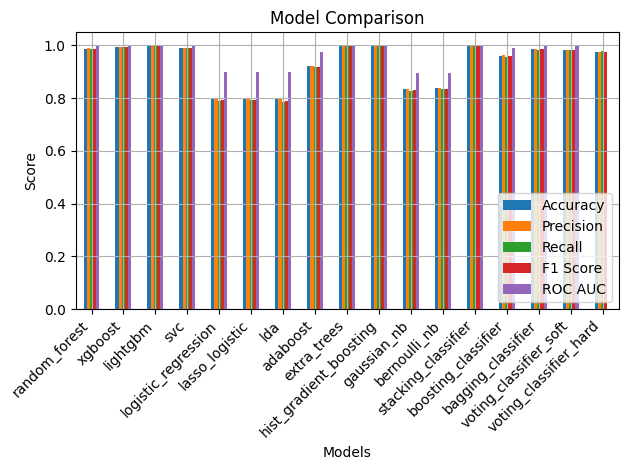

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

# Define the path to save visualizations
VISUALIZATION_PATH = './visualizations'  # Ensure this path is set correctly
if not os.path.exists(VISUALIZATION_PATH):
    os.makedirs(VISUALIZATION_PATH)

def model_comparison(evaluation_results):
    """
    Compare model performance metrics and save visualizations.
    """
    comparison_df = pd.DataFrame(evaluation_results).T  # Transpose to have models as rows

    # Check if 'ROC AUC' is in the DataFrame columns
    if 'ROC AUC' in comparison_df.columns:
        # Sort by ROC AUC as the primary metric
        comparison_df = comparison_df.sort_values(by='ROC AUC', ascending=False)

        # Display the DataFrame as a table
        print("\nModel Performance Comparison:")
        display(comparison_df)

        # Save the DataFrame as a LaTeX table image
        comparison_df.style.set_caption("Model Performance Comparison").to_latex(buf=os.path.join(VISUALIZATION_PATH, 'model_performance_comparison_table.tex'))

        # Create bar plots for accuracy and F1 Score comparison
        comparison_df[['Accuracy', 'F1 Score']].plot(kind='bar', figsize=(12, 6))
        plt.title('Model Comparison - Accuracy and F1 Score')
        plt.ylabel('Score')
        plt.xticks(rotation=45)
        plt.legend(loc='best')
        plt.tight_layout()
        plt.savefig(os.path.join(VISUALIZATION_PATH, 'model_comparison_accuracy_f1.png'))
        plt.close()

        # Create a line plot for ROC AUC comparison
        plt.figure(figsize=(12, 6))
        plt.plot(comparison_df.index, comparison_df['ROC AUC'], marker='o')
        plt.title('Model Comparison - ROC AUC')
        plt.ylabel('ROC AUC Score')
        plt.xticks(rotation=45)
        plt.grid()
        plt.tight_layout()
        plt.savefig(os.path.join(VISUALIZATION_PATH, 'model_comparison_roc_auc.png'))
        plt.close()

        # Correlation Heatmap of Metrics
        correlation_matrix = comparison_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
        plt.title('Correlation Heatmap of Model Performance Metrics')
        plt.tight_layout()
        plt.savefig(os.path.join(VISUALIZATION_PATH, 'model_comparison_heatmap.png'))
        plt.close()

    else:
        print("ROC AUC metrics are not available in the evaluation results.")

def plot_precision_recall_curve(model, X_test, y_test, model_name):
    """
    Plots Precision-Recall curve for the given model.
    """
    y_scores = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, marker='.', label=f'{model_name} - PR Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve: {model_name}')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig(os.path.join(VISUALIZATION_PATH, f'{model_name}_pr_curve.png'))
    plt.close()

def plot_confusion_matrix(model, X_test, y_test, model_name):
    """
    Plots Confusion Matrix for the given model.
    """
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.tight_layout()
    plt.savefig(os.path.join(VISUALIZATION_PATH, f'{model_name}_confusion_matrix.png'))
    plt.close()

def plot_model_comparison(evaluation_results):
    """
    Plots a comparison of accuracy, precision, recall, F1 score, and ROC AUC for different models.
    """
    # Ensure that the evaluation_results is properly structured
    metrics_df = pd.DataFrame({
        model_name: {
            'Accuracy': metrics['Accuracy'],
            'Precision': metrics['Precision'],
            'Recall': metrics['Recall'],
            'F1 Score': metrics['F1 Score'],
            'ROC AUC': metrics['ROC AUC'] if metrics['ROC AUC'] is not None else 0
        }
        for model_name, metrics in evaluation_results.items()
    }).T

    # Display the metrics table
    print("\nModel Performance Metrics:")
    display(metrics_df)

    # Create a bar plot for model comparisons
    plt.figure(figsize=(12, 8))
    metrics_df.plot(kind='bar')
    plt.title('Model Comparison')
    plt.xlabel('Models')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.grid(True)  # Enable grid for better readability
    plt.savefig(os.path.join(VISUALIZATION_PATH, 'model_comparison.png'))
    plt.show()

# Call these functions after evaluating your models
# Assuming evaluate_results is a dictionary with metrics for each model
model_comparison(evaluate_results)
plot_model_comparison(evaluate_results)


In [ ]:
print(tuned_models.keys())  # This will print all the available model keys


dict_keys(['random_forest', 'xgboost', 'lightgbm', 'svc', 'logistic_regression', 'lasso_logistic', 'lda', 'adaboost', 'extra_trees', 'hist_gradient_boosting', 'gaussian_nb', 'bernoulli_nb'])
